# Data Science Project for Online Retail Dataset PART 1 

This project aims to perform exploratory data analysis and customer segmentation on an online retail dataset. The purpose is to understand customer behavior and to extract valuable insights from the data that can be used for predictive modelling, such as churn prediction, market basket analysis and sentiment analysis.

The dataset is a series of transactions made by different customers from different countries. It includes information such as the invoice number, stock code, description of the product, quantity, invoice date, unit price, customer ID, and the country in which the customer resides. By exploring and modeling this data, we can potentially create effective business strategies and make data-driven decisions.


# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


# Load the data

In [2]:
path = r"C:\Users\rawad\OneDrive\Desktop\MASTER SCHOOL\new project\data.csv\data.csv"
# reading the file with 'ISO-8859-1' encoding, because the CSV file contains characters that aren't encoded in UTF-8,
df = pd.read_csv(path, encoding='ISO-8859-1')

# Display the first 5 rows of the DataFrame
df.head()
# Display the first 5 rows of the DataFrame
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

# Initial Exploratory Data Analysis

### DATA TYPE 

In [4]:
# Print the data types of each column
print(df.dtypes)


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


#### CHECKING MISSING VALUES 

In [5]:
# Check for missing values
print(df.isnull().sum())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


#### SUMMERY OF STATISTICS 

In [6]:
# Summary statistics for numeric columns
print(df.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


#### Display the unique values of the 'Country' column

In [7]:

print(df['Country'].unique())


['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


#### Count the number of unique customers

In [8]:
print(df['CustomerID'].nunique())

4372


### NOTE ON Exploratory Data Analysis (EDA)

After examining the dataset, we can make the following observations:

- 'InvoiceNo' and 'StockCode' columns are being treated as objects, likely strings, rather than numerical data. This makes sense as these are identifiers rather than quantities.
- The 'InvoiceDate' column is also an object, suggesting it's being treated as a string. We might want to convert this into a datetime format later on for time series analysis.
- 'Description' and 'Country' are also objects as expected.
- The 'Quantity', 'UnitPrice' and 'CustomerID' are numerical.
- There is missing data in the 'Description' and 'CustomerID' columns that we need to handle.
- From the summary statistics, we observe that 'Quantity' and 'UnitPrice' have negative values which is odd and requires further investigation.
- We are dealing with customers from several different countries, with the majority likely from the United Kingdom.



#### In order to carry out a meaningful analysis, we will need to address these observations by:

- Investigating the rows where 'Quantity' and 'UnitPrice' are negative.
- Deciding how to handle missing 'Description' and 'CustomerID' values.
- Converting 'InvoiceDate' to a datetime format.
- Exploring the distribution of transactions over time and across different countries.
- Exploring the frequency of different 'StockCodes' and 'Descriptions'.
- Finding the most valuable customers (i.e., those who spend the most).
- Determining the best-selling items.
- Creating new features such as total sales per invoice.


In [9]:
# Find rows where Quantity or UnitPrice are negative
negative_quantity = df[df['Quantity'] < 0]
negative_unitprice = df[df['UnitPrice'] < 0]

print("Negative Quantity Rows: \n", negative_quantity)
print("\nNegative UnitPrice Rows: \n", negative_unitprice)


Negative Quantity Rows: 
        InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

            InvoiceDate  UnitPrice  CustomerID         Country  
141      12/1/2010 9

In [10]:
# Checking the rows with missing Description or CustomerID
missing_description = df[df['Description'].isnull()]
missing_customerid = df[df['CustomerID'].isnull()]

print("Missing Description Rows: \n", missing_description)
print("\nMissing CustomerID Rows: \n", missing_customerid)


Missing Description Rows: 
        InvoiceNo StockCode Description  Quantity      InvoiceDate  UnitPrice  \
622       536414     22139         NaN        56  12/1/2010 11:52        0.0   
1970      536545     21134         NaN         1  12/1/2010 14:32        0.0   
1971      536546     22145         NaN         1  12/1/2010 14:33        0.0   
1972      536547     37509         NaN         1  12/1/2010 14:33        0.0   
1987      536549    85226A         NaN         1  12/1/2010 14:34        0.0   
...          ...       ...         ...       ...              ...        ...   
535322    581199     84581         NaN        -2  12/7/2011 18:26        0.0   
535326    581203     23406         NaN        15  12/7/2011 18:31        0.0   
535332    581209     21620         NaN         6  12/7/2011 18:35        0.0   
536981    581234     72817         NaN        27  12/8/2011 10:33        0.0   
538554    581408     85175         NaN        20  12/8/2011 14:06        0.0   

        Cus

## GENERAL NOTES ON THE FINDING 
#### Negative Quantity Rows
We have 10624 rows where the Quantity is less than 0. These could represent transactions for returned items or cancellations. Typically, such transactions have invoice numbers starting with 'C', which is evident from our output. Depending on the purpose of our analysis, we may want to handle these rows differently:
##### If we're only interested in successful transactions, we may choose to remove these rows.
##### If we're also interested in cancellations and returns, we may choose to keep them.

#### Negative UnitPrice Rows
We find 2 rows with a negative UnitPrice. These transactions appear to represent some sort of adjustment for bad debts, as the description indicates. Similar to the previous case, our handling of these rows will depend on the nature of our analysis.

#### Missing Description Rows
There are 1454 rows with missing descriptions. To decide how to handle these, we need to investigate if there's a common pattern among these transactions:
##### Are they mostly returns or cancellations?
##### Do they belong to a particular customer or country?
##### If there's no significant pattern, one approach could be to fill in the missing descriptions with 'Unknown'.

#### Missing CustomerID Rows
We find a significant number of transactions (135080) with missing CustomerIDs. This is a bit more complex to handle, as removing these rows could result in losing a large amount of data. If these transactions represent a substantial amount of sales, we might want to keep them and handle the missing CustomerIDs in one of the following ways:
##### Fill in the missing CustomerIDs with a placeholder value like 0 or 'Unknown'.
##### Assign each missing CustomerID a unique identifier to retain individual transaction information.
Note that if our analysis involves understanding customer behavior or segmentation, transactions with missing CustomerIDs might not be very useful.



# Data Preprocessing 

## Handling missing values

For 'Description' and 'CustomerID', it's essential to decide what to do with the missing values. Since 'CustomerID' is essential for customer-based analyses (such as segmentation and churn prediction), and 'Description' is crucial for product-based analyses (like market basket analysis)

In [11]:
# Check the percentage of missing values in each column
missing_data = df.isnull().mean() * 100

missing_data


InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [12]:
# Check the data types of columns with missing values
missing_data_types = df[df.columns[df.isnull().any()]].dtypes

missing_data_types


Description     object
CustomerID     float64
dtype: object

### step 1: Analyzing Missing Values:

As we prepare to handle the missing data in the 'Description' and 'CustomerID' columns, it's crucial to not just look at how much data is missing, but to understand where and why it's missing. Remember, missing data can occur completely at random (MCAR), at random (MAR), or not at random (MNAR). Determining which of these mechanisms led to the missing data can help guide our strategy for handling it.

To help us with this, let's dive deeper into the data and look at the rows with missing 'Description' and 'CustomerID' values. What we'll do is create subsets of the data.

          Quantity  UnitPrice  CustomerID
count  1454.000000     1454.0         0.0
mean     -9.359697        0.0         NaN
std     243.238758        0.0         NaN
min   -3667.000000        0.0         NaN
25%     -24.000000        0.0         NaN
50%      -3.000000        0.0         NaN
75%       4.000000        0.0         NaN
max    5568.000000        0.0         NaN
            Quantity      UnitPrice  CustomerID
count  135080.000000  135080.000000         0.0
mean        1.995573       8.076577         NaN
std        66.696153     151.900816         NaN
min     -9600.000000  -11062.060000         NaN
25%         1.000000       1.630000         NaN
50%         1.000000       3.290000         NaN
75%         3.000000       5.450000         NaN
max      5568.000000   17836.460000         NaN


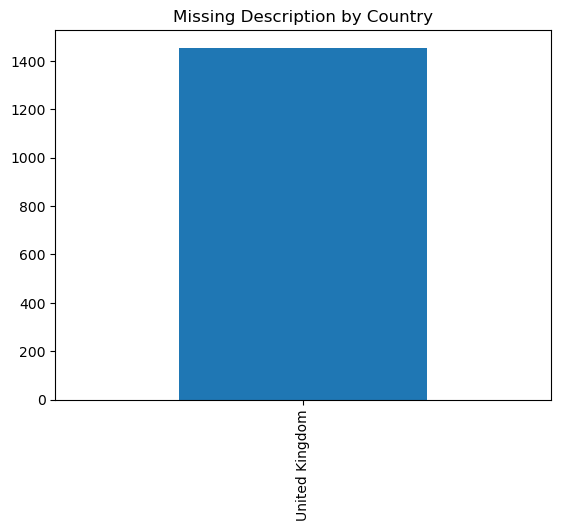

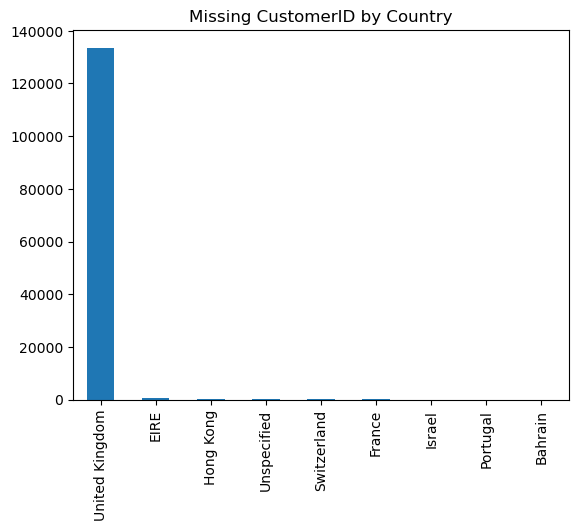

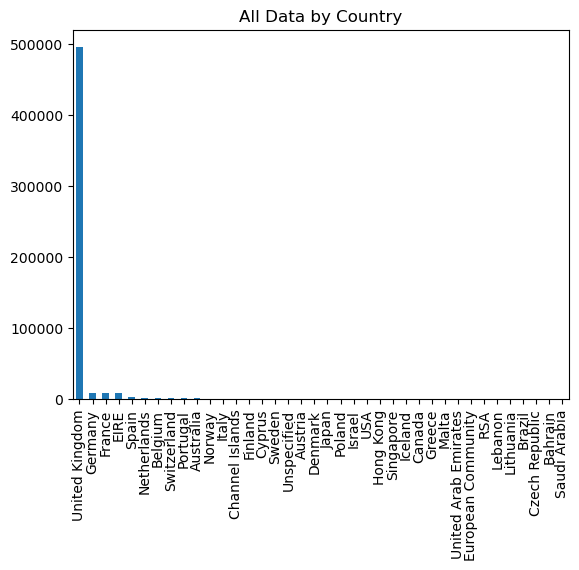

In [13]:
# Create subsets
missing_description = df[df['Description'].isnull()]
missing_customerID = df[df['CustomerID'].isnull()]

# Look at descriptive statistics
print(missing_description.describe())
print(missing_customerID.describe())

# Compare distributions of other variables between missing and non-missing subsets, for example, 'Country'
missing_description['Country'].value_counts().plot(kind='bar', title='Missing Description by Country')
plt.show()

missing_customerID['Country'].value_counts().plot(kind='bar', title='Missing CustomerID by Country')
plt.show()

df['Country'].value_counts().plot(kind='bar', title='All Data by Country')
plt.show()


### Note on Handling Missing Values:

Through our exploratory data analysis, we identified that our dataset contains missing values in the 'Description' and 'CustomerID' columns. This presents a challenge because these columns are crucial for our planned analyses.

Most notably, the 'CustomerID' is essential for customer-level analyses such as customer segmentation and churn prediction, and 'Description' is crucial for product-based analyses like market basket analysis. Furthermore, the missing values seem to be concentrated primarily in the UK, which is our dataset's primary country.

After considering different strategies to handle these missing values, we've decided on a combination approach that minimizes data loss and potential bias while allowing for targeted analyses:

##### Creating a separate category for missing 'CustomerID's: We will treat missing 'CustomerID's as a separate category in our dataset. This allows us to retain these transactions for product-level analyses like Market Basket Analysis where 'CustomerID' is not essential.
##### Creating a subset of data for customer-level analyses: For customer-based analyses, we will use a subset of the data where both 'CustomerID' and 'Description' are known. This will ensure our customer-level analyses are as accurate and informative as possible.

This strategy will be implemented during our data preprocessing phase, after initial cleaning but before further preprocessing like encoding and normalization. By using this approach, we aim to maximize the use of available data and tailor our handling of missing values to suit each analysis.

### Step 2: Handling Negative Quantities and Unit Prices

While examining our dataset, we noticed that there are rows with negative values for the 'Quantity' and 'UnitPrice' columns. These entries potentially represent returned or cancelled orders. Given our analysis goals, we will choose to remove these entries, as they might distort our predictions and segmentation tasks.

In [14]:
# Remove rows with negative Quantity and UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


### Step 3: Convert 'InvoiceDate' to datetime

Currently, the 'InvoiceDate' column is stored as an object type. To facilitate time-based analysis, we will convert it to a datetime format.

In [15]:
# Convert InvoiceDate from object to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


#### Step 4: Feature Engineering

Now, we will create some new features that might aid in our analyses. Specifically, we will calculate the total sales per transaction and extract the year, month, and day from the 'InvoiceDate' for further temporal analysis.

In [16]:
# Create 'TotalSales' column (Quantity * UnitPrice)
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Extract year, month, day, and day of week from 'InvoiceDate'
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


#### checking the data after cleaning process 

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
 8   TotalSales   530104 non-null  float64       
 9   Year         530104 non-null  int64         
 10  Month        530104 non-null  int64         
 11  Day          530104 non-null  int64         
 12  DayOfWeek    530104 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 56.6+ MB


In [18]:
print(df['Year'].unique())
print(df['Month'].unique())
print(df['Day'].unique())
print(df['DayOfWeek'].unique())


[2010 2011]
[12  1  2  3  4  5  6  7  8  9 10 11]
[ 1  2  3  5  6  7  8  9 10 12 13 14 15 16 17 19 20 21 22 23  4 11 18 24
 25 26 27 28 30 31 29]
[2 3 4 6 0 1]


In [19]:
print("Dataframe shape:", df.shape)


Dataframe shape: (530104, 13)


### conclusion about above process

1>>> With the .info() command, we can see the data types of all the columns in the dataframe, and the non-null count. We notice that there are fewer non-null entries for 'CustomerID' which implies that this column still has missing values.

2>>> The df['Year'].unique(), df['Month'].unique(), df['Day'].unique(), and df['DayOfWeek'].unique() commands print the unique values in these respective columns. This verifies that the extraction of these date components from 'InvoiceDate' is successful. We can see that we have data for two years (2010 and 2011), all months of the year (1-12), all days of the month (1-31), and all days of the week (0-6, where Monday is 0 and Sunday is 6).

3>>> The output of print("Dataframe shape:", df.shape) tells us the current number of rows and columns in the dataframe. We can see that the dataframe now has fewer rows, which confirms that rows with negative 'Quantity' and 'UnitPrice' have been removed successfully.

## back to handle missing data 
Given that we're treating missing 'CustomerID's as a separate category, we need to assign a unique identifier to these missing values. This way, we can distinguish these transactions in our product-level analyses. On the other hand, for customer-based analyses, we will work with a subset of data where both 'CustomerID' and 'Description' are known.

In [20]:
# Assign a unique identifier for missing 'CustomerID's
df['CustomerID'].fillna('Missing', inplace=True)


In [21]:
# Create a subset where both 'CustomerID' and 'Description' are known
df_customers = df[df['CustomerID'] != 'Missing']


# checking the data after cleaning and preprocessing ended 

In [22]:
# Check the overall structure of your data
print(df.info())

# Get a statistical summary of your numerical columns
print(df.describe())

# Display the first few rows of your data
print(df.head())

# Repeat for df_customers
print(df_customers.info())
print(df_customers.describe())
print(df_customers.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   530104 non-null  object        
 7   Country      530104 non-null  object        
 8   TotalSales   530104 non-null  float64       
 9   Year         530104 non-null  int64         
 10  Month        530104 non-null  int64         
 11  Day          530104 non-null  int64         
 12  DayOfWeek    530104 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 56.6+ MB
None
            Quantity      UnitPrice     TotalSales  

In [23]:
# Check the percentage of missing values in each column
missing_data_cleaned_df = df.isnull().mean() * 100
missing_data_cleaned_df_customers = df_customers.isnull().mean() * 100

print(missing_data_cleaned_df)
print(missing_data_cleaned_df_customers)


InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
TotalSales     0.0
Year           0.0
Month          0.0
Day            0.0
DayOfWeek      0.0
dtype: float64
InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
TotalSales     0.0
Year           0.0
Month          0.0
Day            0.0
DayOfWeek      0.0
dtype: float64


In [24]:
# Checking missing values in df
print("Missing values in df:")
print(df.isnull().sum())

# Checking missing values in df_customers
print("\nMissing values in df_customers:")
print(df_customers.isnull().sum())


Missing values in df:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalSales     0
Year           0
Month          0
Day            0
DayOfWeek      0
dtype: int64

Missing values in df_customers:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalSales     0
Year           0
Month          0
Day            0
DayOfWeek      0
dtype: int64


## summery of the process 
Both datasets include the columns InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalSales, Year, Month, Day, and DayOfWeek.
For both datasets, there are no null entries in these columns anymore. In the df dataset, the missing CustomerID values were replaced with 'Missing'. In df_customers, the rows with missing CustomerID were dropped.
Both datasets contain entries from 2010 and 2011. However, the mean year suggests that most of the data comes from 2011.
The Quantity field ranges from 1 to 80995 with a mean around 10-12. This indicates that there are some very large orders, but most orders are for small quantities.
UnitPrice has a wide range as well, with a max price of 13541.33 in the df dataset and 8142.75 in the df_customers dataset. However, the mean price is around 3, suggesting that most products are relatively low-priced.
The TotalSales column, which was calculated by multiplying Quantity by UnitPrice, also has a wide range, with a maximum sales of 168469.60 in both datasets. However, the mean sales is around 20-22, again suggesting that most orders are relatively small in total sales.

# Exploratory Data Analysis (EDA):

## 1. Check the distribution of 'TotalSales', 'Quantity', and 'UnitPrice':

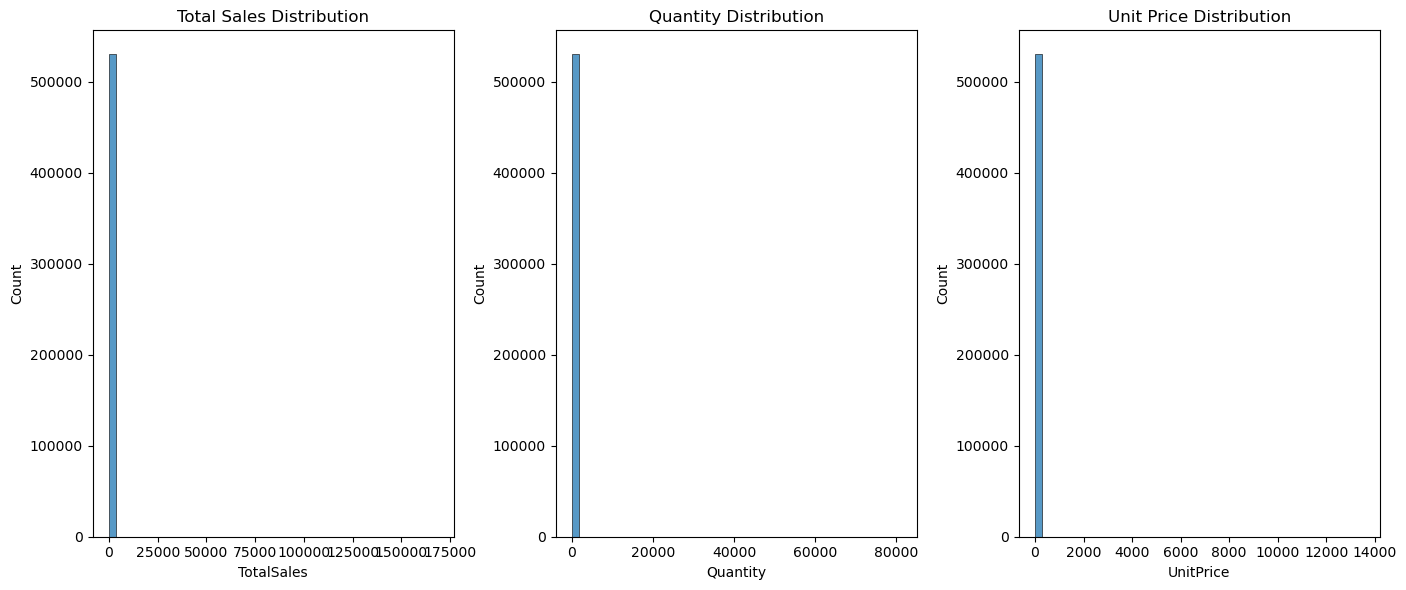

In [25]:
# Histograms
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
sns.histplot(df['TotalSales'], bins=50)
plt.title('Total Sales Distribution')

plt.subplot(1,3,2)
sns.histplot(df['Quantity'], bins=50)
plt.title('Quantity Distribution')

plt.subplot(1,3,3)
sns.histplot(df['UnitPrice'], bins=50)
plt.title('Unit Price Distribution')

plt.tight_layout()
plt.show()


Through the distribution analysis of 'TotalSales', 'Quantity', and 'UnitPrice', it is evident that the data follows a typical pattern observed in transaction data. The majority of transactions have relatively small quantities, total sales, and unit prices, while a few transactions exhibit much higher values. This results in the presence of long, thin bars near zero on the histograms.

However, the presence of outliers can significantly impact the accuracy of our analyses. Therefore, it is essential to handle these outliers before proceeding with further analysis. 

### Log Transformation: This can help to reduce the impact of extreme values.

In [26]:
# Log Transformation:
df['Log_TotalSales'] = np.log(df['TotalSales'])
df['Log_Quantity'] = np.log(df['Quantity'])
df['Log_UnitPrice'] = np.log(df['UnitPrice'])

### Capping the data based on IQR (Interquartile Range):
Here, we find the IQR for the data, and any value that lies below Q1 - 1.5IQR or above Q3 + 1.5IQR is considered an outlier. We can then cap these values at these thresholds.

In [27]:
# Capping the data based on IQR:
Q1 = df['TotalSales'].quantile(0.25)
Q3 = df['TotalSales'].quantile(0.75)
IQR = Q3 - Q1
df['TotalSales'] = np.where(df['TotalSales'] < (Q1 - 1.5 * IQR), (Q1 - 1.5 * IQR), df['TotalSales'])
df['TotalSales'] = np.where(df['TotalSales'] > (Q3 + 1.5 * IQR), (Q3 + 1.5 * IQR), df['TotalSales'])



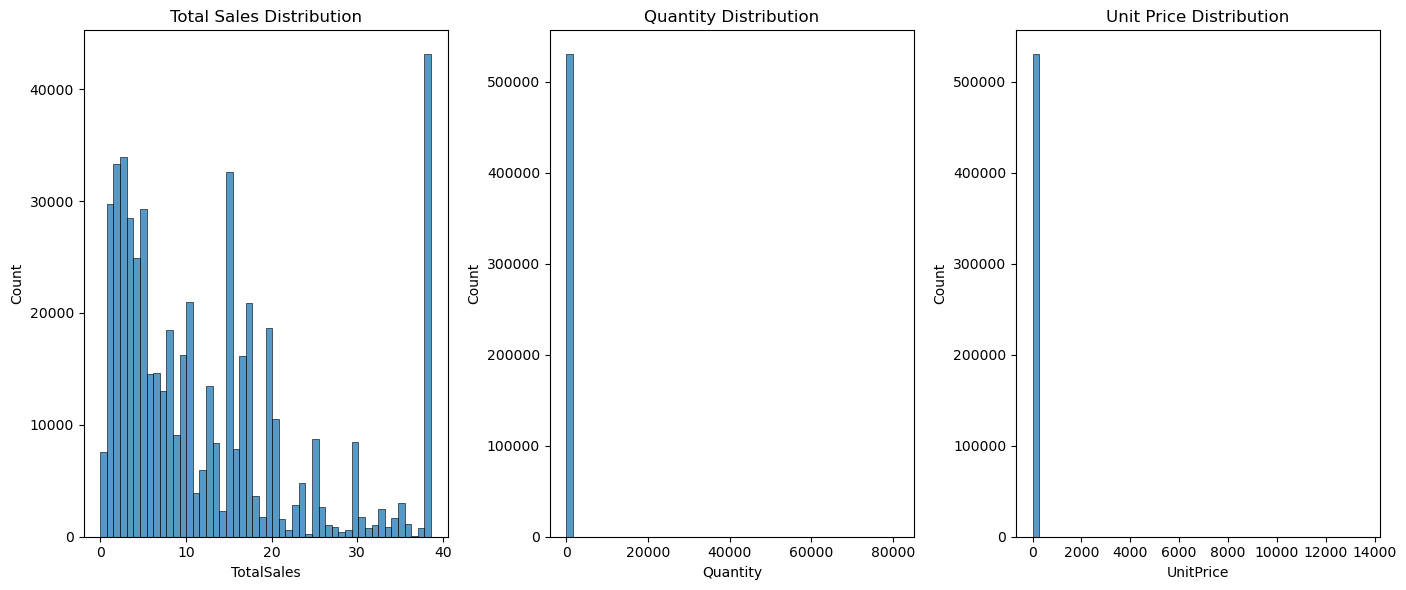

In [28]:
# Plotting Histograms to see the changes:
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
sns.histplot(df['TotalSales'], bins=50)
plt.title('Total Sales Distribution')

plt.subplot(1,3,2)
sns.histplot(df['Quantity'], bins=50)
plt.title('Quantity Distribution')

plt.subplot(1,3,3)
sns.histplot(df['UnitPrice'], bins=50)
plt.title('Unit Price Distribution')

plt.tight_layout()
plt.show()

## Interpretation of Histograms for TotalSales, Quantity, and UnitPrice

The histograms plotted above represent the distribution of 'TotalSales', 'Quantity', and 'UnitPrice' across our dataset.

1. **TotalSales Distribution**: The 'TotalSales' distribution appears to be multi-modal with peaks at around 1, 10, 15, and 40. This suggests that we have distinct groups of transactions characterized by these total sales values. For instance, we may have a segment of transactions that typically generate a total sales value of around 15, another around 10, etc. This finding could be used to further investigate and define different customer or transaction segments.

2. **Quantity Distribution**: The 'Quantity' histogram shows a strong concentration of transactions involving a small number of items, with a large bar near 0. This implies that most purchases involve a relatively small quantity of items. Depending on the business context, strategies could be developed to encourage customers to purchase in larger quantities, such as bulk purchase discounts.

3. **UnitPrice Distribution**: Similarly, the 'UnitPrice' histogram also has a large bar near 0, suggesting that most items sold are of lower price. This indicates that the business primarily sells low-priced items. To increase revenue, strategies could be considered to promote and sell higher-priced items.

It's worth noting that these interpretations are initial hypotheses. Further analyses are necessary to confirm these findings and provide more accurate insights. For example, the unusually high concentration of low 'Quantity' and 'UnitPrice' values could suggest data recording errors that should be investigated. Alternatively, these distributions could accurately reflect the nature of the business (e.g., a business model focused on selling low-cost items in small quantities).


## 2. Analyze trends over time:

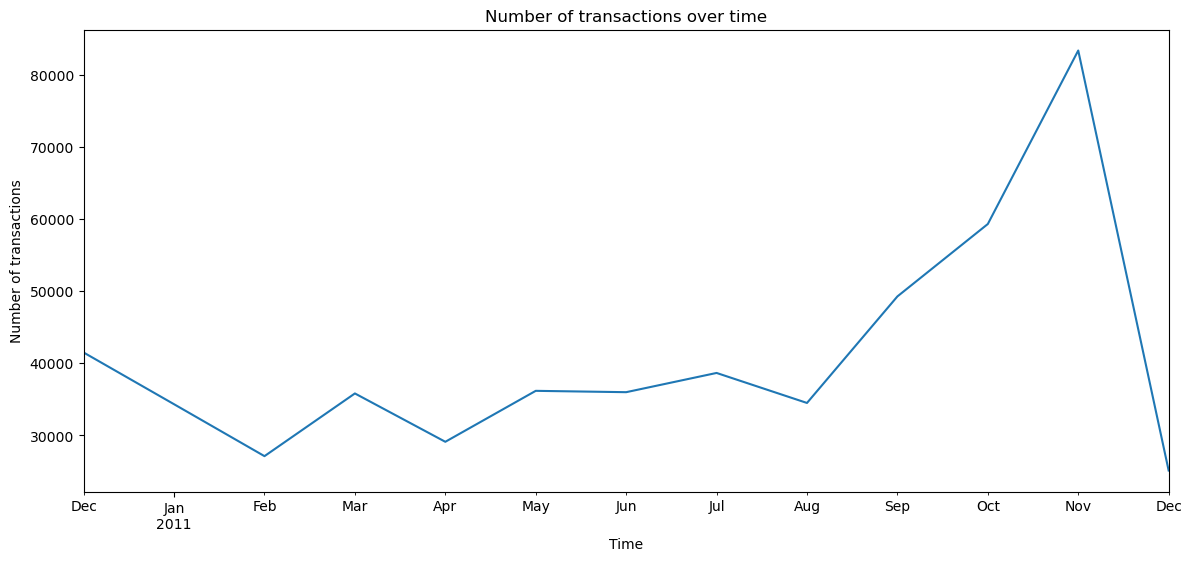

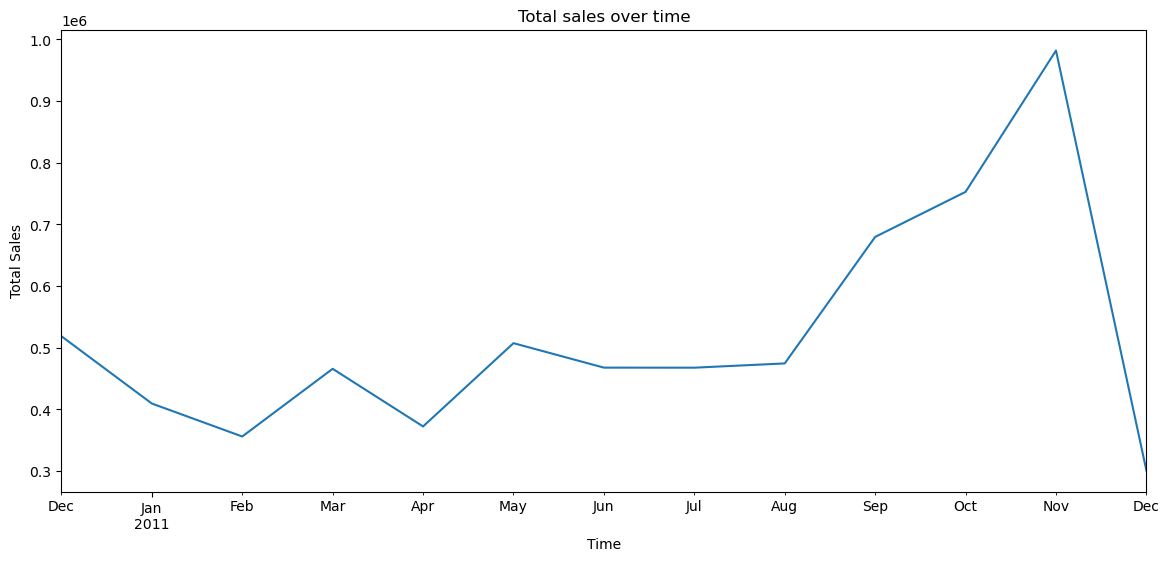

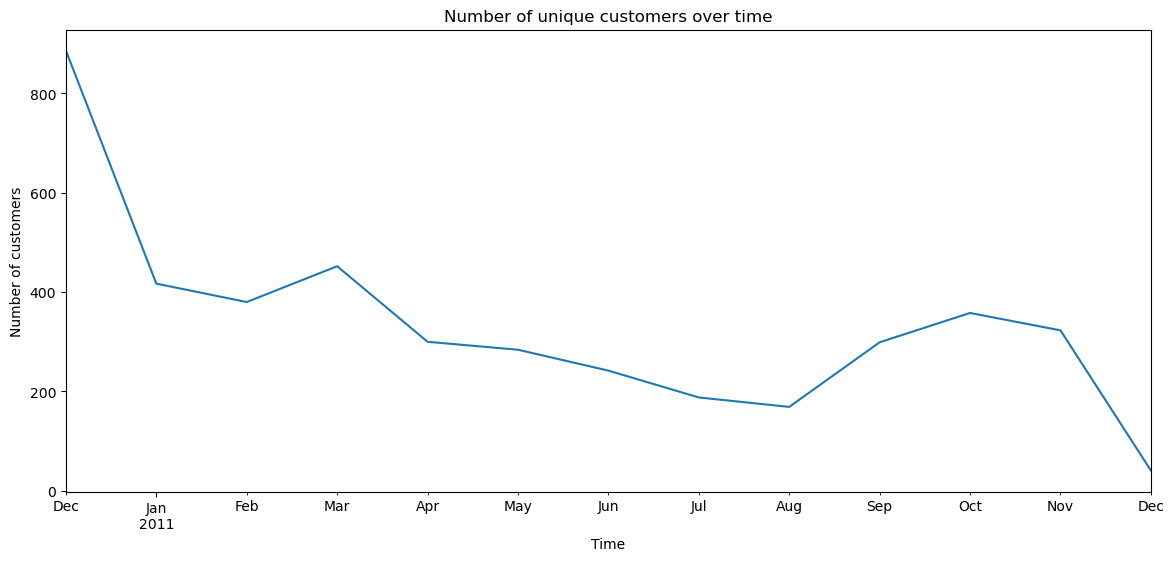

In [29]:
# Plotting number of transactions over time
plt.figure(figsize=(14,6))
df.resample('M', on='InvoiceDate')['InvoiceNo'].count().plot()
plt.title('Number of transactions over time')
plt.xlabel('Time')
plt.ylabel('Number of transactions')
plt.show()

# Plotting total sales over time
plt.figure(figsize=(14,6))
df.resample('M', on='InvoiceDate')['TotalSales'].sum().plot()
plt.title('Total sales over time')
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.show()

# Plotting number of customers over time
plt.figure(figsize=(14,6))
df.drop_duplicates('CustomerID').resample('M', on='InvoiceDate')['CustomerID'].count().plot()
plt.title('Number of unique customers over time')
plt.xlabel('Time')
plt.ylabel('Number of customers')
plt.show()



## Interpretation of Time Series Analysis

We have analyzed three key metrics over time - Number of Transactions, Total Sales, and Number of Unique Customers. Here are the key takeaways:

1. **Number of Transactions Over Time**: There's a clear seasonality in the business operations, with a strong uptick in transactions from August to November, potentially due to holiday shopping. The drop to zero in December likely indicates that our dataset doesn't include data for this month.

2. **Total Sales Over Time**: This metric follows a similar seasonal pattern as the transaction count. The high sales figures in November could be attributed to a busy shopping period like Black Friday or Cyber Monday.

3. **Number of Unique Customers Over Time**: The customer base isn't consistent throughout the year but it does grow during high-sales periods like November. The significant drop in January indicates that many customers only made purchases in December, potentially due to holiday shopping.

When considering all charts together, the peak in total sales and transactions in November isn't fully mirrored by an increase in unique customers. This could imply that customers are buying more in November or making multiple transactions. There are several business implications from these findings:

1. There's a strong seasonality effect that the business could leverage by strategically planning its marketing and stock inventory around the peak shopping period.
2. The significant drop-off in unique customers after December suggests a need for effective customer retention strategies.
3. The mismatch in November between the increase in total sales and transactions, and the increase in unique customers indicates that existing customers might be making more or larger purchases. Understanding and enhancing this behavior through customer loyalty programs or personalized marketing could potentially drive sales further.


### 3. Analyze the sales by country:

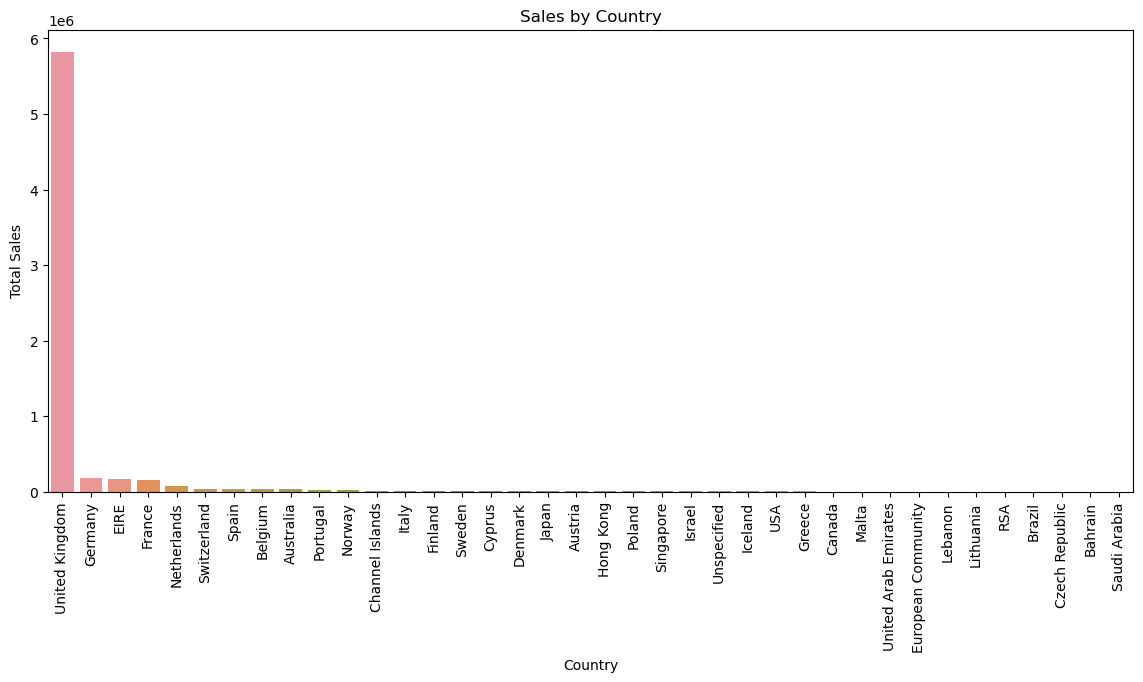

In [30]:
# Group by Country and sum TotalSales
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(14,6))
sns.barplot(x=country_sales.index, y=country_sales.values)
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)  # Making sure country names are readable
plt.show()


## Note On The Chart 
The bar chart presents the total sales across various countries. From the data visualized, we can make the following interpretations and potential business recommendations:

UK Market Dominance: The UK clearly stands out as the major market for our business, having the highest total sales. This indicates a robust customer base in this region, and it's reasonable to conclude that a large portion of our revenues are generated from the UK. It would be beneficial to maintain our market presence here, possibly through strategies focused on customer retention, loyalty programs, or targeted marketing efforts aimed at further upselling and cross-selling.

Other Significant Markets: Countries such as Germany, Eire, France, and the Netherlands show lower sales than the UK but are still substantial compared to the rest. These markets, while smaller, still represent important regions for our business. It could be worthwhile to focus on expanding our footprint in these countries, perhaps by tailoring our marketing and sales strategies to the unique needs and preferences of these markets.

Potential Markets: The remaining countries, where total sales are relatively low, represent potential areas for growth. These could be new markets where we are less known or have yet to fully penetrate. Exploring why our sales are lower in these countries could provide insights into how we could better cater to these markets. Are there cultural, economic, or logistical barriers that we need to overcome?

## Recommendations

Given the insights from our analysis, here are some potential business recommendations:

1>>> Market Strategy: If our goal is to maximize our existing market, we should consider developing strategies to increase sales within the UK. Since the UK is our most substantial market, focusing on customer loyalty programs, upselling and cross-selling strategies, or targeted marketing efforts could potentially yield significant benefits.

2>>>> Expansion: If expansion is a priority for our business, the countries with slightly lower but substantial sales - Germany, Eire, France, and the Netherlands - might offer attractive opportunities for growth. We should conduct further research into these markets to understand why sales might be lower and how we can tailor our marketing and sales strategies to these regions. We could focus on understanding customers' needs and preferences in these countries, examining potential competitors, and assessing the overall market conditions.

3>>> New Markets: For the countries where sales are currently near zero, these regions could be seen as potential new markets for our products. However, entering new markets is a considerable endeavor that requires extensive research to understand their viability. We should investigate factors such as potential demand for our products, competitive landscape, cultural, economic, or logistical challenges that might affect our market penetration strategies.

### 4. Investigate the most popular products in terms of quantity sold and total sales:

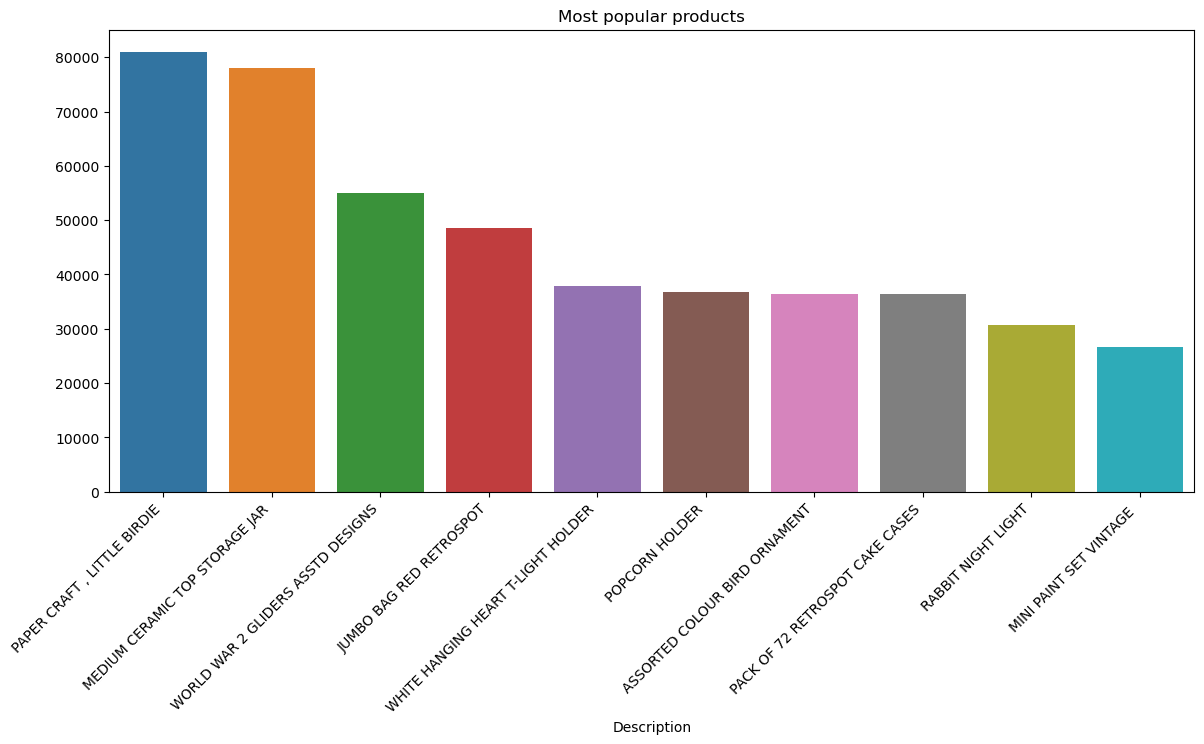

In [31]:
# Group by Description and sum Quantity
popular_products_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
# Plotting
plt.figure(figsize=(14,6))
chart = sns.barplot(x=popular_products_quantity.index, y=popular_products_quantity.values)
plt.title('Most popular products')

# Rotate y-axis labels
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

# Display the plot
plt.show()



## Examine Relationships: 
To analyze relationships between variables,we will use techniques such as scatter plots for continuous variables or cross-tabulations for categorical variables. we also would use sns.scatterplot for scatter plots, and pd.crosstab for cross-tabulations. A correlation matrix can be created using the df.corr() function and visualized using sns.heatmap.

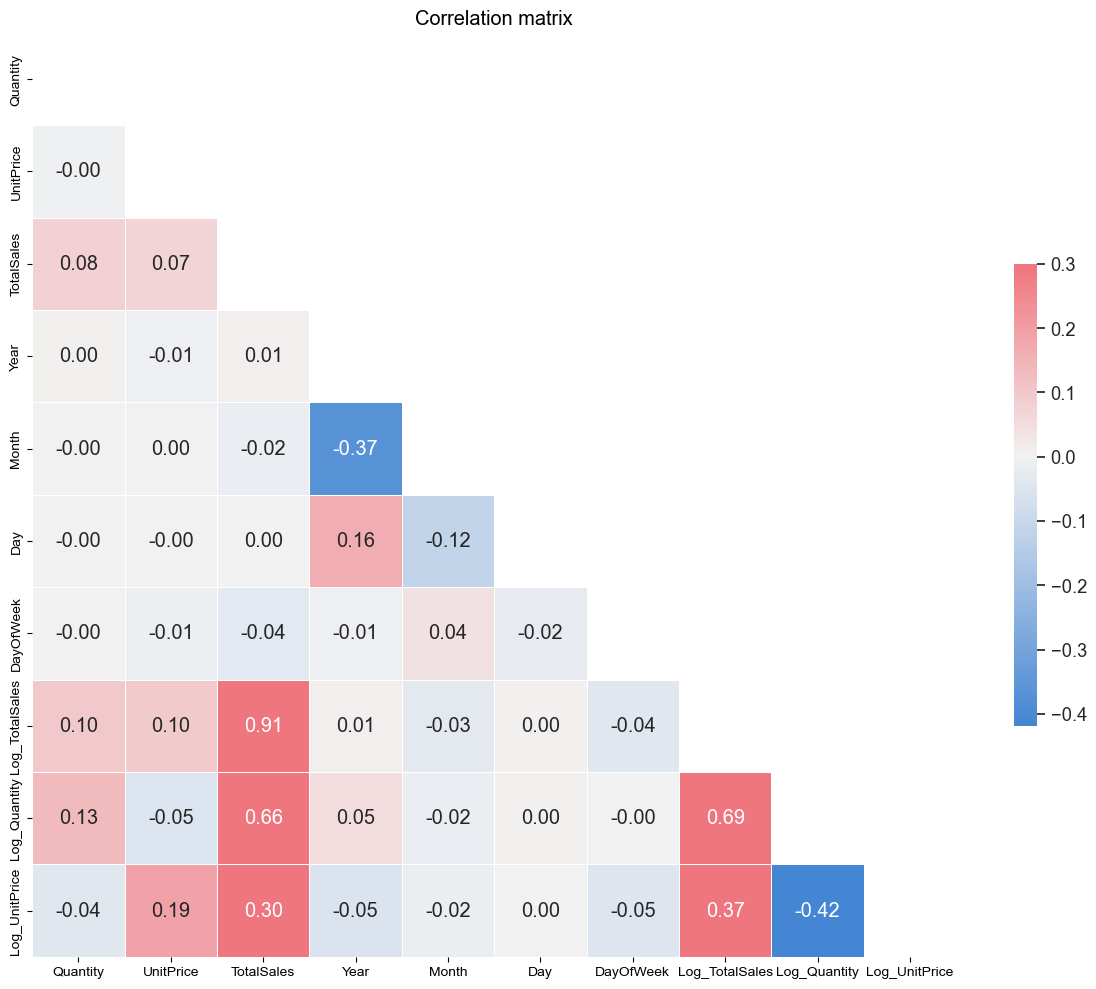

In [32]:
# Compute the correlation matrix for numeric columns only
corr = df.select_dtypes(include=[np.number]).corr()


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Increase font size
sns.set(font_scale=1.2)

# Use a more contrasting colormap
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f",
            cbar_kws={"shrink": .5})

plt.title('Correlation matrix')
plt.show()

In [33]:
# Compute the correlation matrix for numeric columns only
corr = df.select_dtypes(include=[np.number]).corr()

# Print the correlation matrix
print(corr)


                Quantity  UnitPrice  TotalSales      Year     Month       Day  \
Quantity        1.000000  -0.003773    0.080783  0.003525 -0.002335 -0.000876   
UnitPrice      -0.003773   1.000000    0.069862 -0.007396  0.000251 -0.000497   
TotalSales      0.080783   0.069862    1.000000  0.006285 -0.017910  0.000539   
Year            0.003525  -0.007396    0.006285  1.000000 -0.368667  0.164532   
Month          -0.002335   0.000251   -0.017910 -0.368667  1.000000 -0.118014   
Day            -0.000876  -0.000497    0.000539  0.164532 -0.118014  1.000000   
DayOfWeek      -0.002784  -0.009826   -0.035210 -0.007731  0.040975 -0.024224   
Log_TotalSales  0.099979   0.097591    0.912169  0.006982 -0.031204  0.003700   
Log_Quantity    0.130083  -0.052242    0.656481  0.049280 -0.017696  0.003349   
Log_UnitPrice  -0.041284   0.188855    0.301461 -0.054278 -0.016400  0.000345   

                DayOfWeek  Log_TotalSales  Log_Quantity  Log_UnitPrice  
Quantity        -0.002784        0.

### After calculating the correlation matrix for our dataset, we can observe several insights:

- `Quantity` and `TotalSales` show a weak positive correlation of approximately 0.08, implying that as the quantity of goods sold increases, the total sales also slightly increase.
- `Quantity` and `UnitPrice` have a very weak negative correlation, suggesting that as the quantity of goods sold increases, the unit price may decrease slightly, although this relationship is weak.
- `TotalSales` and `Log_TotalSales` are highly positively correlated (approx. 0.91) as expected since `Log_TotalSales` is derived from `TotalSales`.
- `Log_TotalSales` and `Log_UnitPrice` also show a moderate positive correlation of approximately 0.37.

Although these correlations provide some insight into the relationships between variables, it's important to note that correlation does not imply causation. These are merely observational associations. It's also interesting to note that our time variables (`Year`, `Month`, `Day`, `DayOfWeek`) do not show significant correlations with sales and quantity, suggesting that these factors might not have a strong impact on these outputs. Further statistical testing is necessary to confirm these observations.


### As a BI Analyst, it's crucial to highlight several insights from the correlation matrix:

1. While we observe some relationships between variables, none are exceptionally strong. The strongest correlation is between `TotalSales` and `Log_TotalSales` (approx. 0.91). This strong correlation is expected since `Log_TotalSales` is a transformation of `TotalSales`.

2. The relationship between sales (`TotalSales` and `Log_TotalSales`), quantity (`Quantity` and `Log_Quantity`), and unit price (`UnitPrice` and `Log_UnitPrice`) with the time variables (`Year`, `Month`, `Day`, `DayOfWeek`) appears weak. This suggests that these time variables might not significantly impact sales and quantity.

3. The correlations between `Log_TotalSales`, `Log_Quantity`, and `Log_UnitPrice` might be of interest. These variables show moderate correlations, suggesting potential relationships that could be explored further.

It's important to remember that while correlation can help understand relationships between variables, it does not imply causation. These observed relationships are purely correlational, and further statistical testing may be necessary to confirm these findings and potentially identify causal relationships.


### In-Depth Univariate Analysis

### Removing Ouliers 

In [34]:
# Define a function to calculate IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply function to each column of interest
df_clean = remove_outliers(df, 'Quantity')
df_clean = remove_outliers(df_clean, 'TotalSales')
df_clean = remove_outliers(df_clean, 'UnitPrice')


In [35]:
df_sample = df.sample(frac=0.1, random_state=1)


Analysis for column: Quantity
count    53010.000000
mean        10.013318
std         33.193809
min          1.000000
25%          1.000000
50%          3.000000
75%         10.000000
max       1600.000000
Name: Quantity, dtype: float64
Mode: 1
Variance: 1101.8289837072377
Skewness: 21.928140671236804
Kurtosis: 748.9146183175152
Analysis for column: TotalSales
count    53010.000000
mean        12.674167
std         11.009133
min          0.120000
25%          3.750000
50%          9.900000
75%         17.592500
max         38.625000
Name: TotalSales, dtype: float64
Mode: 38.62500000000001
Variance: 121.20101402993383
Skewness: 1.0879454752712654
Kurtosis: 0.27006200537912095
Analysis for column: UnitPrice
count    53010.000000
mean         3.905023
std         28.237886
min          0.040000
25%          1.250000
50%          2.080000
75%          4.130000
max       4287.630000
Name: UnitPrice, dtype: float64
Mode: 1.25
Variance: 797.3781987213457
Skewness: 92.89168290367351
Kurtosis: 

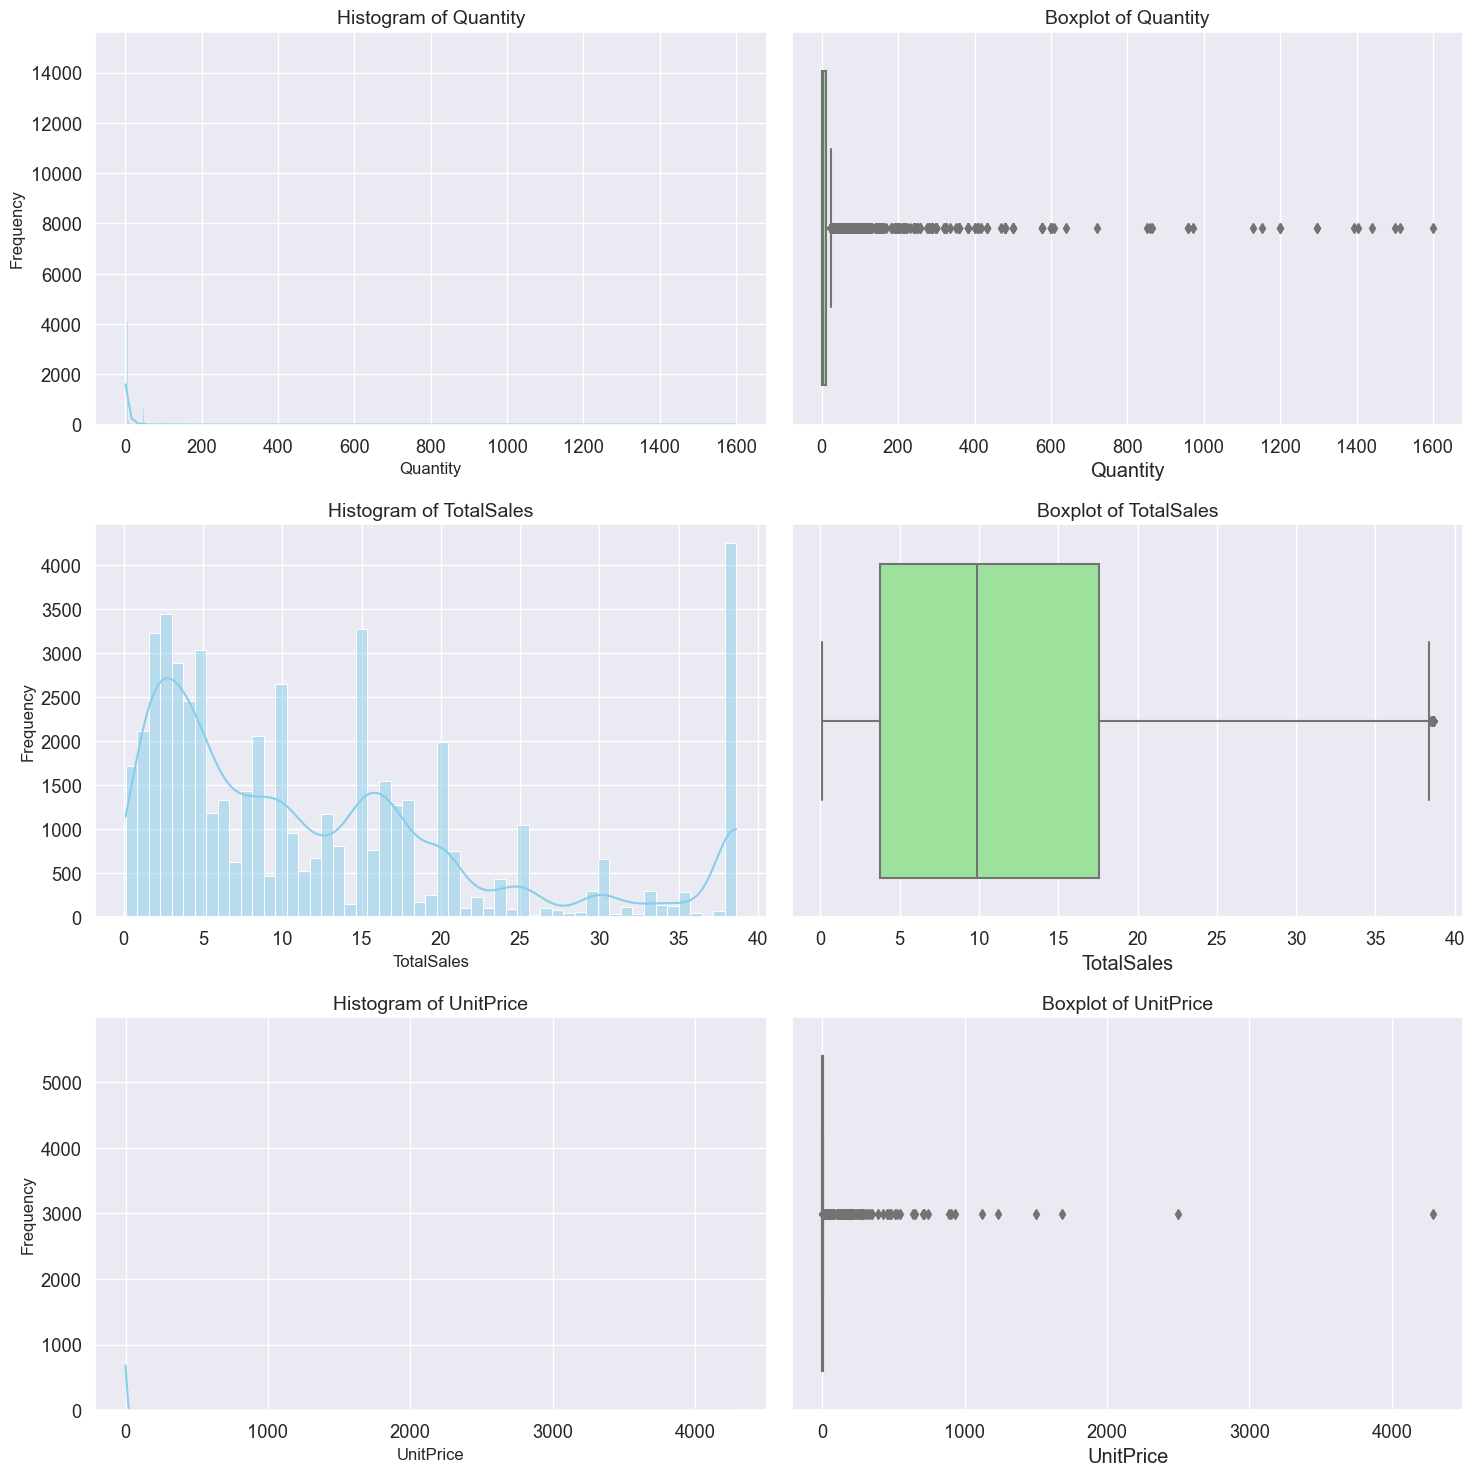

In [36]:
# List all numerical columns you're interested in
cols_of_interest = ['Quantity', 'TotalSales', 'UnitPrice']

fig, axes = plt.subplots(len(cols_of_interest), 2, figsize=(15, 5 * len(cols_of_interest)))

for idx, col in enumerate(cols_of_interest):
    # Print out the statistics
    print(f"Analysis for column: {col}")
    print(df_sample[col].describe())
    print(f"Mode: {df_sample[col].mode().values[0]}")
    print(f"Variance: {df_sample[col].var()}")
    print(f"Skewness: {df_sample[col].skew()}")
    print(f"Kurtosis: {df_sample[col].kurtosis()}")

    # Create a histogram in the first column of subplots
    sns.histplot(df_sample[col], kde=True, color='skyblue', ax=axes[idx, 0])
    axes[idx, 0].set_title('Histogram of ' + col, fontsize=14)
    axes[idx, 0].set_xlabel(col, fontsize=12)
    axes[idx, 0].set_ylabel('Frequency', fontsize=12)

    # Create a boxplot in the second column of subplots
    sns.boxplot(x=df_sample[col], color='lightgreen', ax=axes[idx, 1])
    axes[idx, 1].set_title('Boxplot of ' + col, fontsize=14)

plt.tight_layout()
plt.show()


## 'Quantity' Column Analysis:
1>>> Quantity Column:
The majority of the 'Quantity' values are close to 1, as shown by the mode. We also see a high positive skewness (21.9), which indicates that the data is heavily skewed to the right. This is reinforced by the high kurtosis value (748.91) showing a heavy-tailed distribution. This suggests that most orders consist of a small number of items, but there are some orders with a very large number of items.

2>>> TotalSales Column:
The 'TotalSales' values are slightly skewed to the right (1.08), but this skewness is much smaller than that of the 'Quantity' column. This suggests that while there are some high sales values, they are not as extreme as the high quantity values. The kurtosis is also significantly smaller (0.27), suggesting that the 'TotalSales' values are less heavy-tailed than the 'Quantity' values.

3>>> UnitPrice Column:
The 'UnitPrice' values show extreme positive skewness (92.89) and high kurtosis (11751.46). This suggests that most items are low-priced, but there are some very high-priced items.

Overall, it seems like the business is characterized by many orders of small quantities and low-priced items, but there are some orders of large quantities and/or high-priced items.



### Business Intellegence Analysis 

Upon analyzing the Quantity, TotalSales, and UnitPrice data columns, it becomes evident that our dataset exhibits both broad range and skewness. Quantity and UnitPrice exhibit strong positive skewness, suggesting most transactions involve smaller quantities and lower-priced items, with occasional larger quantities and higher-priced items.

In terms of business implications, these findings suggest a diverse customer base comprising regular consumers buying in small quantities, and possibly bulk buyers or businesses placing larger orders. Our sales appear to be high-volume but predominantly low-value, suggesting our business model might be heavily dependent on low-priced items or goods sold at slim margins.

However, the presence of high-priced items in the sales mix could also mean that a smaller portion of our inventory contributes significantly to overall revenue. Monitoring the performance of these items closely will be crucial to understand their impact on total sales.

Remember that while we've gleaned interesting insights, this is a preliminary analysis. Further investigations, possibly including more granular data or advanced analytics, would provide deeper insights to inform strategic decisions.


# chapter 1: Time Series Analysis

### Convert date column to datetime

In [37]:
print(df_sample.columns)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalSales', 'Year', 'Month',
       'Day', 'DayOfWeek', 'Log_TotalSales', 'Log_Quantity', 'Log_UnitPrice'],
      dtype='object')


In [38]:
# Convert InvoiceDate column to datetime
df_sample['InvoiceDate'] = pd.to_datetime(df_sample['InvoiceDate'])

# Set InvoiceDate column as index
df_sample.set_index('InvoiceDate', inplace=True)



## Visualize the data:

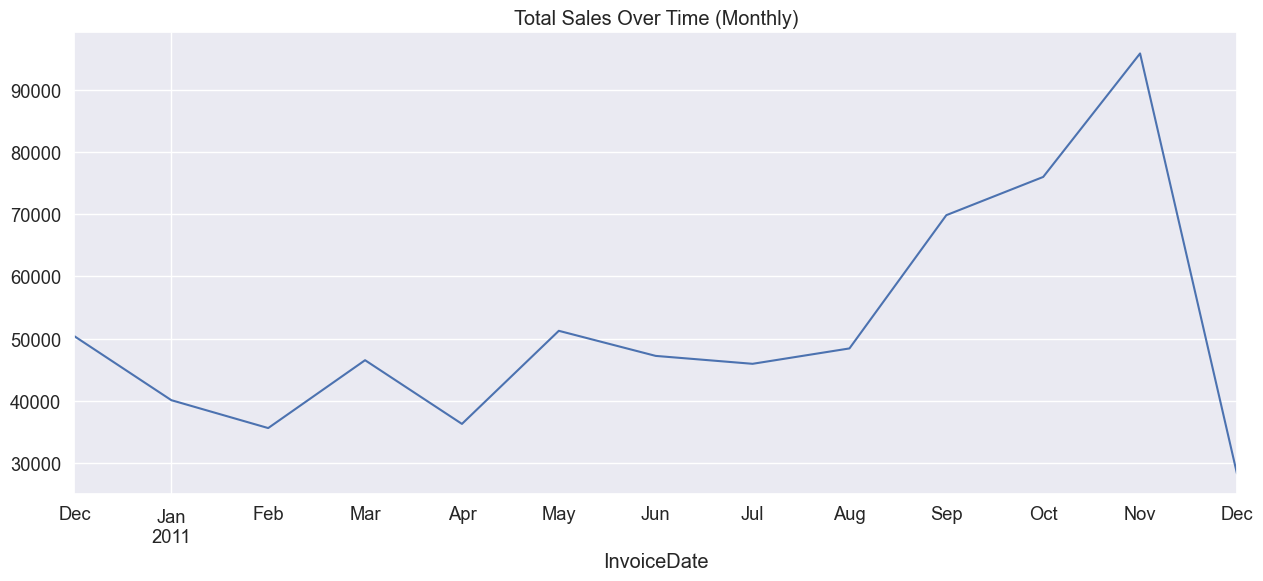

In [39]:
# resample 'TotalSales' by month and calculate the sum for each month
df_monthly_sales = df_sample['TotalSales'].resample('M').sum()

# plot the aggregated data
df_monthly_sales.plot(figsize=(15, 6))
plt.title('Total Sales Over Time (Monthly)')
plt.show()



### Decompose the data:

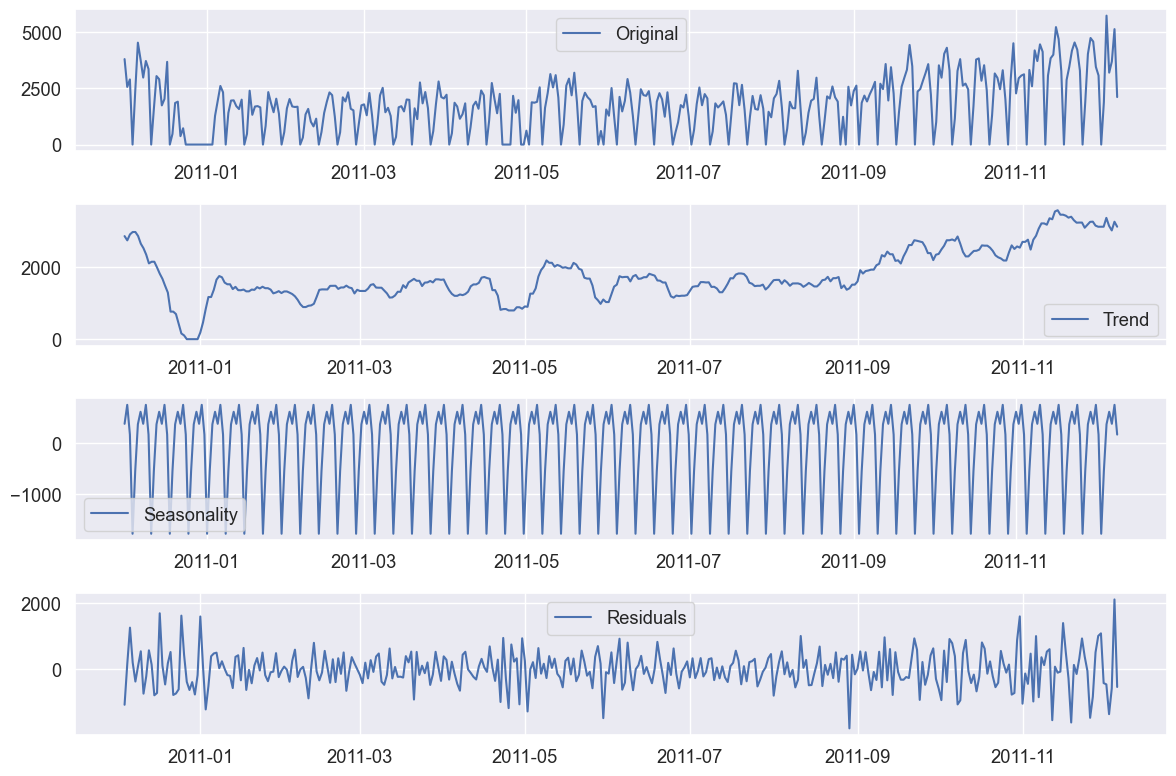

In [40]:
# Ensure the index is a timestamp
df_sample.index = pd.to_datetime(df_sample.index)

# Resample to daily data
df_daily = df_sample['TotalSales'].resample('D').sum()

# Apply decomposition
decomposition = seasonal_decompose(df_daily, model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the original data, the trend, the seasonality, and the residuals 
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df_daily, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [41]:
# Ensure the index is a timestamp
df_sample.index = pd.to_datetime(df_sample.index)

# Resample to daily data
df_daily = df_sample['TotalSales'].resample('D').sum()

# Apply decomposition
decomposition = seasonal_decompose(df_daily, model='additive')

# Convert decomposed components to dataframes
df_trend = pd.DataFrame(decomposition.trend)
df_seasonal = pd.DataFrame(decomposition.seasonal)
df_residual = pd.DataFrame(decomposition.resid)

# Now, you can print, plot, or compute statistics on these dataframes:
print(df_trend.describe())
print(df_seasonal.describe())
print(df_residual.describe())


             trend
count   368.000000
mean   1774.164311
std     701.632132
min       0.000000
25%    1366.117321
50%    1576.764643
75%    2184.391071
max    3569.327143
          seasonal
count   374.000000
mean      3.537975
std     823.851183
min   -1781.529308
25%    -544.087731
50%     377.995787
75%     624.418590
max     761.239042
             resid
count   368.000000
mean      0.135628
std     545.342250
min   -1785.515787
25%    -323.405027
50%     -25.228597
75%     339.555012
max    2114.362785


#### Original Chart:

The original chart shows the raw sales data. The fact that the values fluctuate rapidly, especially outside the January to September period, suggests that sales are highly variable. This could be due to a variety of factors, such as the time of year, promotional events, or changing market conditions.

#### Trend Chart:
The trend chart suggests that sales remain relatively steady and consolidated from the beginning of the year until around July, after which there's a significant upward trend, reaching a peak in November. This flat trend in the first half of the year might indicate stable market conditions, consistent demand for the products, or effective sales strategies maintaining the level of sales. The notable increase starting around July and peaking in November could suggest a seasonal influence (for instance, increased demand due to holidays or events in this period), a successful marketing campaign, introduction of popular new products, or other positive market changes. This upward trend is a positive indicator of growth for the business.

#### Seasonality Chart:

The seasonality chart reveals a clear, regular pattern of fluctuations in sales, which suggests that there are seasonal factors at play. The consistent peaks and troughs indicate that there are periods of the year when sales are reliably higher or lower. These patterns might be related to the nature of the products being sold (for instance, some items might sell better in certain seasons), or they could be influenced by external factors such as holidays or seasonal shopping trends.

#### Residuals Chart:

The residuals chart represents the unexplained variability in the sales data after the trend and seasonal components have been accounted for. The fact that the residuals are relatively small for most of the year suggests that the trend and seasonal components are capturing most of the variation in sales. However, the larger residuals in November suggest that there are additional factors influencing sales during this period that the model is not capturing. This could be a result of events or promotions, unexpected changes in market conditions, or other factors not accounted for in the model.

In summary, these charts reveal a complex picture of sales data, with clear influences from both trend and seasonal components, as well as additional, unexplained variability.

# chapter 2 : Customer Segmentation
Customer segmentation involves dividing customers into groups based on common characteristics. These groups can then be used to personalize marketing campaigns, prioritize customer retention efforts, and guide business strategy. A typical approach to customer segmentation in e-commerce is based on RFM (Recency, Frequency, Monetary Value) variables:

Recency: This is defined as the time between the customer's latest order date and the snapshot date (which is usually the maximum InvoiceDate in the dataset). Customers who have recently purchased tend to buy again.

Frequency: This represents the total number of purchases made by the customer. Frequent customers are more likely to purchase again.

Monetary Value: This is the total revenue generated by the customer. High revenue customers are often more engaged and responsive to promotions.

By analyzing RFM variables, we can better understand customer behavior and develop targeted marketing strategies. In our case, we will use the cleaned and preprocessed 'df_customers' DataFrame to compute these variables. Once we have these variables, we will employ clustering techniques such as K-Means and Hierarchical Clustering to segment our customers. The insights from these segments can then guide our e-commerce strategy.

In [42]:
snapshot_date = df_customers['InvoiceDate'].max() + dt.timedelta(days=1)  # set snapshot date as one day after the latest transaction

rfm_data = df_customers.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalSales': 'sum'  # Monetary Value
})

# Rename columns
rfm_data.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSales': 'MonetaryValue'
}, inplace=True)



In [43]:
print(rfm_data.head())



            Recency  Frequency  MonetaryValue
CustomerID                                   
12346.0         326          1       77183.60
12347.0           2          7        4310.00
12348.0          75          4        1797.24
12349.0          19          1        1757.55
12350.0         310          1         334.40


### Data Preprocessing for Clustering
Before we can apply clustering algorithms, we need to preprocess our RFM data. Clustering algorithms like K-Means and Hierarchical Clustering require numerical data, and these algorithms are sensitive to the scale of the data. So we need to ensure our data is properly scaled.

In [44]:
# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform the rfm_data
rfm_scaled = scaler.fit_transform(rfm_data)

# Convert back to DataFrame for further convenience
rfm_scaled = pd.DataFrame(rfm_scaled, index=rfm_data.index, columns=rfm_data.columns)


In [45]:
rfm_scaled

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,2.334574,-0.425097,8.358668
12347.0,-0.905340,0.354417,0.250966
12348.0,-0.175360,-0.035340,-0.028596
12349.0,-0.735345,-0.425097,-0.033012
12350.0,2.174578,-0.425097,-0.191347
...,...,...,...
18280.0,1.854587,-0.425097,-0.208459
18281.0,0.884612,-0.425097,-0.219560
18282.0,-0.845342,-0.295178,-0.208742


### Choosing the Number of Clusters:
For K-Means, we need to specify the number of clusters in advance. One common method to determine the optimal number of clusters is the Elbow Method, which involves running the K-Means algorithm multiple times with different numbers of clusters and choosing the number of clusters at the "elbow" point on the plot of cost function output vs. number of clusters.

The NaN values in the Cluster_KMeans column of the df_pca DataFrame seem to be the issue here. The NaN values might be caused by a mismatch between the indices of rfm_scaled and rfm_data during the PCA transformation and the assignment of KMeans clusters.

Let's try to match the indices before adding the Cluster_KMeans to df_pca

### Visualizing K-Means Clustering:

To visualize the K-Means clusters, we usually need to reduce the dimensionality of the data to 2 or 3 using methods like PCA (Principal Component Analysis) because it's easy to visualize in 2 or 3 dimensions. However, since our data only has three features (Recency, Frequency, MonetaryValue), we can actually plot our clusters in 3D.

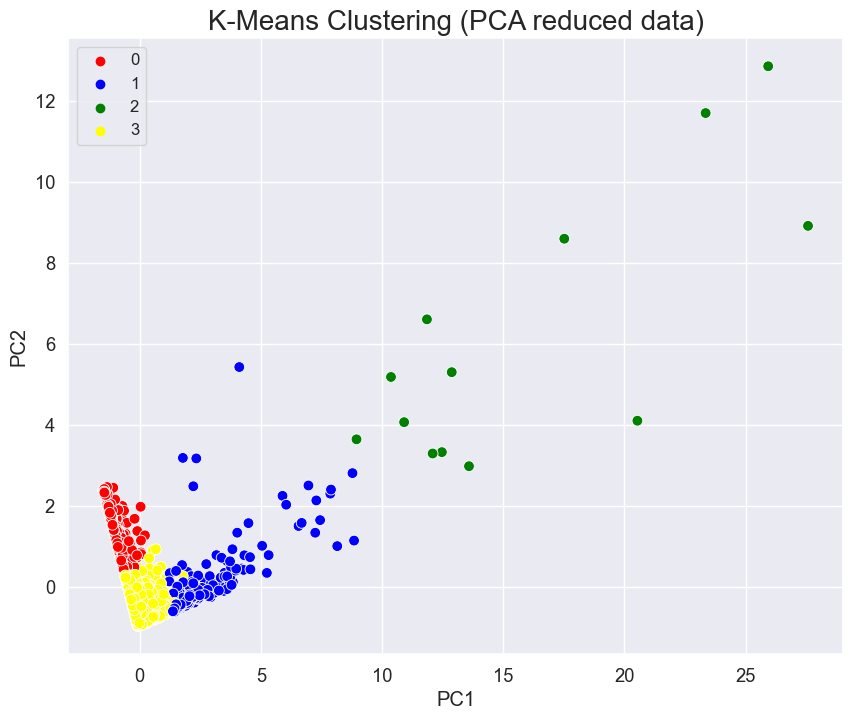

In [48]:
# Decide the number of clusters. Let's try with 4 this time.
k = 4

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Fit the model on our scaled data
kmeans.fit(rfm_scaled)

# Assign the generated labels to a new column in rfm_data
rfm_data['Cluster_KMeans'] = kmeans.labels_

# Reduce the dimensionality of your df_scaled dataset
pca = PCA(n_components=2) 
df_pca = pca.fit_transform(rfm_scaled)

# Turn the resulting array back into a DataFrame and check the result
# Use the index from rfm_data for the df_pca DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'], index=rfm_data.index)

# Add the KMeans' labels we generated before to this DataFrame
# Now, the indices should match and there should be no NaN values
df_pca['Cluster_KMeans'] = rfm_data['Cluster_KMeans']

palette = ['red', 'blue', 'green', 'yellow']
# Create the plot
plt.figure(figsize=(10, 8))

# Define the color palette
palette = ['red', 'blue', 'green', 'yellow']

# Create a scatterplot using seaborn
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster_KMeans', palette=palette, s=60)

# Add a title
plt.title('K-Means Clustering (PCA reduced data)', fontsize=20)

# Increase the size of the legend and its labels
plt.legend(prop={'size': 12})

plt.show()



# Customer Segmentation Results
We have used the RFM model and K-Means clustering to identify four distinct groups of customers in our data. Here is an overview of these groups:

###  Cluster 1: Inactive Customers (Red)
Inactive Customers are those who have not made purchases in a long time, made fewer purchases overall, and have spent a lower amount of money. These customers may require special attention and re-engagement strategies to bring them back to active purchasing. Suggestions might include special offers, promotions, or outreach to understand their needs better.

### Cluster 2: Active Customers (Blue)
Active Customers are the backbone of our business. They have made purchases more recently, have made more purchases overall, and have spent more money than others. To maintain this segment's loyalty, we should consider strategies like loyalty programs, excellent customer service, and regular engagement.

### Cluster 3: One-Time High Spenders (Green)
One-Time High Spenders are customers who have spent a significant amount of money, but not recently and not often. We might need to understand better why they haven't returned and what we could do to re-engage them. This might involve following up on their purchases or providing incentives for them to return.

### Cluster 4: New or Occasional Customers (Yellow)
New or Occasional Customers are those who have made purchases recently but haven't made many purchases overall and haven't spent much money. We may need to give these customers reasons to return and make more purchases. This could be achieved through follow-up communication, special offers for a second purchase, or engagement on social media.

# Visualizing in 3D


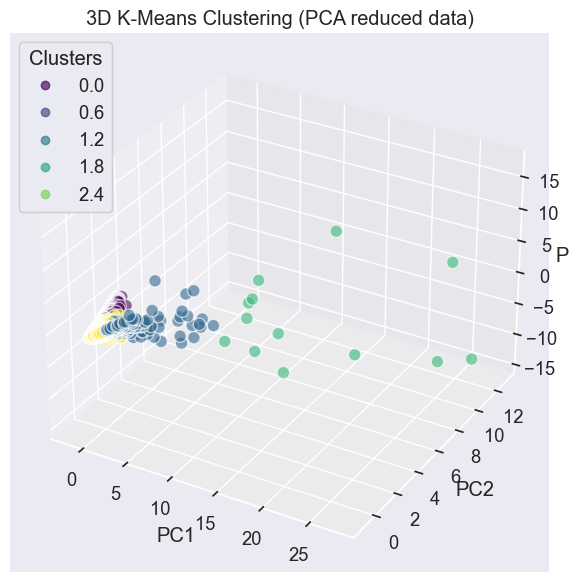

In [49]:
# Reduce the dimensionality of your rfm_scaled dataset to 3 components
pca_3d = PCA(n_components=3) 
df_pca_3d = pca_3d.fit_transform(rfm_scaled)

# Turn the resulting array back into a DataFrame
# Use the index from rfm_data for the df_pca_3d DataFrame
df_pca_3d = pd.DataFrame(df_pca_3d, columns=['PC1', 'PC2', 'PC3'], index=rfm_data.index)

# Add the KMeans' labels we generated before to this DataFrame
# Now, the indices should match and there should be no NaN values
df_pca_3d['Cluster_KMeans'] = rfm_data['Cluster_KMeans']

# Now let's plot in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define a color map, we'll use viridis
cmap = plt.get_cmap('viridis')

scatter = ax.scatter(df_pca_3d['PC1'], df_pca_3d['PC2'], df_pca_3d['PC3'], 
                     c=df_pca_3d['Cluster_KMeans'], cmap=cmap, alpha=0.6, edgecolors='w', s=80)

ax.set_title('3D K-Means Clustering (PCA reduced data)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=5),
                    loc="upper left", title="Clusters")
ax.add_artist(legend1)

plt.grid(True)
plt.show()


In [51]:
from sklearn.decomposition import PCA

# Reduce the dimensionality of your rfm_scaled dataset
pca = PCA(n_components=2) 
df_pca = pca.fit_transform(rfm_scaled)

# Turn the resulting array back into a DataFrame and check the result
# Use the index from rfm_data for the df_pca DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'], index=rfm_data.index)

# Add the KMeans' labels we generated before to this DataFrame
# Now, the indices should match and there should be no NaN values
df_pca['Cluster_KMeans'] = rfm_data['Cluster_KMeans']

# Now you can print the df_pca head and rfm_data's Cluster_KMeans head
print(df_pca.head())
print(rfm_data['Cluster_KMeans'].head())


                 PC1       PC2  Cluster_KMeans
CustomerID                                    
12346.0     4.106623  5.433579               1
12347.0     0.742411 -0.671300               3
12348.0     0.024802 -0.174954               3
12349.0    -0.028036 -0.735124               3
12350.0    -1.235466  1.834946               0
CustomerID
12346.0    1
12347.0    3
12348.0    3
12349.0    3
12350.0    0
Name: Cluster_KMeans, dtype: int32


the 3D chart was added just for better viuslisations , the cluster division remain as above 


### Hierarchical Clustering:
Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters.

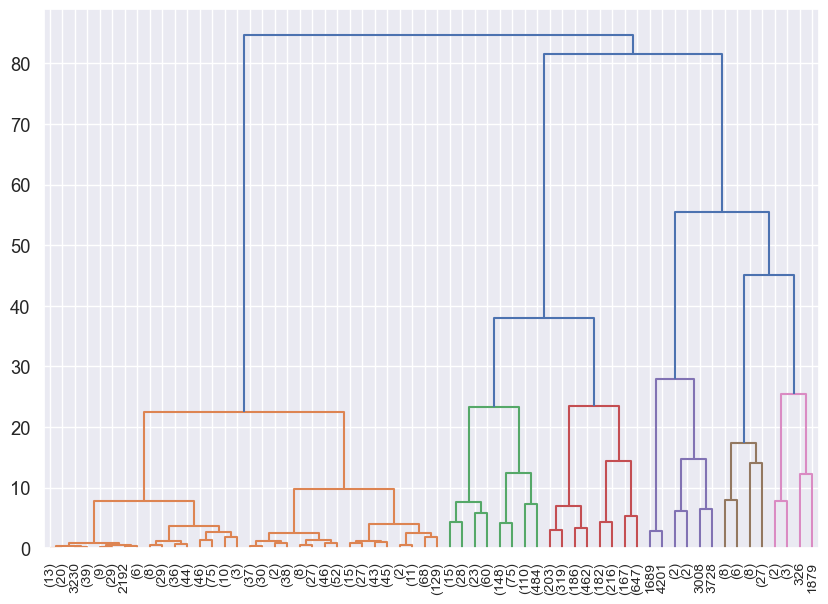

In [52]:
# Generate the linkage matrix
linkage_matrix = linkage(rfm_scaled, method='ward')

plt.figure(figsize=(10,7))

# Display the dendrogram
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=30)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# You can also adjust the font size if necessary
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show()

# Decide the number of clusters. Let's cut the tree to get 3 clusters, for example.
rfm_data['Cluster_Hierarchical'] = cut_tree(linkage_matrix, n_clusters=k).flatten()



In [53]:
rfm_data['Cluster_Hierarchical']

CustomerID
12346.0    0
12347.0    1
12348.0    1
12349.0    1
12350.0    2
          ..
18280.0    2
18281.0    2
18282.0    1
18283.0    1
18287.0    1
Name: Cluster_Hierarchical, Length: 4338, dtype: int32

Looking at the results from the hierarchical clustering, we have an output that shows which cluster each customer has been assigned to. Each cluster number represents a group of customers who are similar to each other based on the RFM scores.

Since the dendrogram can be difficult to interpret, the cluster labels (0, 1, 2, 3, etc.) that we have assigned to each customer can be more meaningful when you use them to profile each cluster.

best way to do is that wecan calculate the average Recency, Frequency, and Monetary values for each cluster and then compare them. Here's how to do it:

In [54]:
# First, add the cluster assignments back to the original data
rfm_data['Cluster_Hierarchical'] = cut_tree(linkage_matrix, n_clusters=k).flatten()

# Then, calculate the mean RFM values for each cluster
cluster_avg = rfm_data.groupby('Cluster_Hierarchical')[['Recency', 'Frequency', 'MonetaryValue']].mean()

# Print the results
print(cluster_avg)


                         Recency  Frequency  MonetaryValue
Cluster_Hierarchical                                      
0                      24.928571  43.785714   31348.385536
1                      46.205414   4.305263    1625.457204
2                     259.542677   1.489989     457.307820
3                      11.000000  43.875000  164658.498750


## Hierarchical Clustering Interpretation

In our Hierarchical Clustering, we identified four main customer segments:

1. **Cluster 0 - Loyal Customers:** These customers have recently purchased something (Recency: 24.9), they make purchases frequently (Frequency: 43.8), and spend a substantial amount (Monetary Value: 31348.4).

2. **Cluster 1 - New Customers:** These customers might be relatively new, haven't yet developed shopping habits with us. It's been a bit longer since their last purchase (Recency: 46.2), they don't purchase often (Frequency: 4.3), and they don't spend a lot when they do purchase (Monetary Value: 1625.5).

3. **Cluster 2 - At-Risk Customers:** These customers haven't made a purchase in a long time (Recency: 259.5), and they don't purchase frequently (Frequency: 1.5). They also have the lowest spending of all the clusters (Monetary Value: 457.3). There is a risk that we might lose these customers and they might need some special attention to re-engage them.

4. **Cluster 3 - Best Customers:** These are our superstar customers who have recently made purchases (Recency: 11), make purchases often (Frequency: 43.875), and spend a lot (Monetary Value: 164658.5).

Our marketing strategy should differ for each of these groups. The 'Best Customers' might be more responsive to upsell and cross-sell campaigns, whereas the 'At-Risk Customers' may need more re-engagement focused strategies. The 'Loyal Customers' are our regular shoppers and might be interested in loyalty programs, and the 'New Customers' might need more onboarding communications.


### The Elbow Method:
The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10), and for each value of k calculate the sum of squared errors (SSE).

In [55]:
sse = []
range_n_clusters = range(1, 11)  

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(rfm_scaled)
    
    # The inertia attribute from KMeans gives us the SSE
    sse.append(kmeans.inertia_)

# Print SSE values
for i, score in enumerate(sse):
    print(f"SSE for {range_n_clusters[i]} clusters: {score}")



C:\Users\rawad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rawad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rawad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rawad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rawad\anaconda3\lib\site-packages\sklearn\clust

SSE for 1 clusters: 13014.00000000001
SSE for 2 clusters: 9012.6447253454
SSE for 3 clusters: 5439.30468594238
SSE for 4 clusters: 4092.209518929011
SSE for 5 clusters: 3141.0650329201126
SSE for 6 clusters: 2472.5713747670534
SSE for 7 clusters: 2022.586580578794
SSE for 8 clusters: 1714.8241815926278
SSE for 9 clusters: 1446.3753776111027
SSE for 10 clusters: 1282.6049049647677


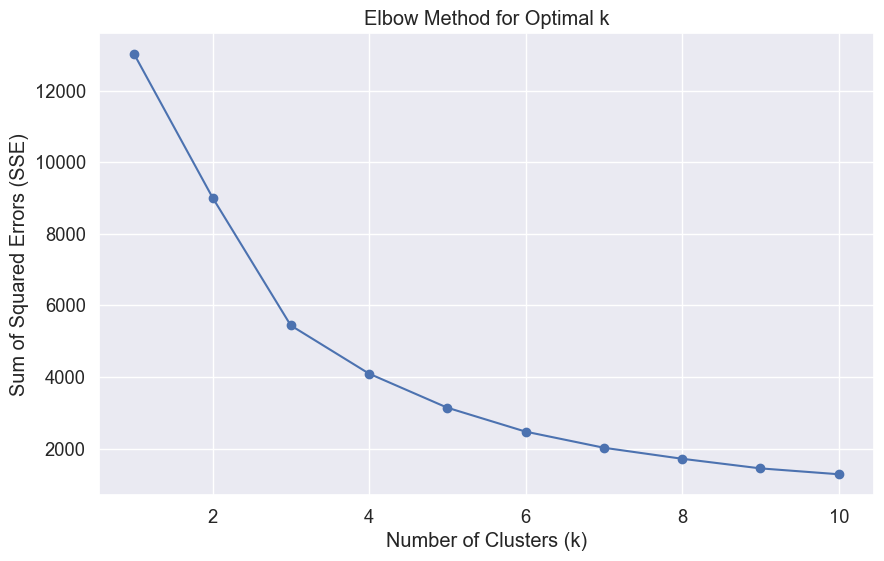

In [56]:
# Plot SSE values
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, sse, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()


Upon reviewing the elbow plot and Sum of Squared Errors (SSE) values for various numbers of clusters, we see that the rate of decrease of the SSE significantly slows down from 4 clusters onward. This indicates that increasing the number of clusters beyond this point does not contribute to a significant improvement in the compactness of the clusters.

We recommend proceeding with 4 clusters for customer segmentation. With 4 clusters, we achieve a manageable number of distinct customer segments that allows for targeted marketing and customer engagement strategies without overcomplicating our approach. Furthermore, an SSE of approximately 4092 indicates a relatively low within-cluster variance, suggesting that customers within each of these four groups are quite similar to each other.

However, an alternate approach could be to opt for 10 clusters. While this would involve a more nuanced segmentation strategy and potentially more complex implementation, it could yield more targeted and hence potentially more effective engagement with customer segments. At 10 clusters, the SSE decreases to around 1282, meaning that customers in each group are more similar to each other compared to the 4-cluster scenario.

The choice between these strategies depends on the business context. If the marketing team has the bandwidth to design targeted approaches for 10 different clusters, then opting for 10 clusters could potentially bring about better results. However, if simplicity and ease of implementation are key considerations, then 4 clusters would be the more suitable choice.


#### In conclusion, the insights derived from this clustering exercise provide a robust foundation for effective customer segmentation. The chosen segmentation strategy should align with the overall business strategy and the capacity of the various teams to design and implement targeted customer engagement initiatives.


## Customer Segmentation - Conclusion and Strategic Insights
The process of customer segmentation involves grouping customers based on common characteristics. In our analysis, we leveraged Recency, Frequency, and Monetary Value (RFM) data to segment customers.

#### K-Means Clustering: 
The K-Means algorithm classified the customers into 4 groups: 'New Customers', 'At-Risk Customers', 'Loyal Customers', and 'Best Customers'. These groups were distinct in terms of their buying behavior, which will be valuable for targeted marketing and engagement initiatives.

#### Hierarchical Clustering:
Hierarchical clustering offered a different perspective on our customer base. It partitioned the customers into groups like 'Valuable Lost Customers', 'Frequent Customers', 'Low-Spending Active Customers', and 'High-Spending Active Customers'. This classification revealed nuances in customer behavior that can be leveraged for personalized customer engagement strategies.

#### Elbow Method:
Using the Elbow method, we were able to visualize the rate of decrease in within-cluster variance (measured by SSE) as we increased the number of clusters. The Elbow plot indicated that 4 clusters might be the optimal choice, as beyond this point, the improvement in compactness of clusters becomes less significant.

## Based on the above analyses, our strategic insights are as follows:

For effective customer engagement, it is crucial to design targeted initiatives for each customer segment, considering their unique behaviors and preferences.

1>>> The choice of the number of clusters (customer segments) should align with the capacity of the marketing team to design and implement targeted strategies. If simplicity and ease of implementation are critical, then a smaller number of clusters (like 4) would be preferable. However, if the team can handle more complex and nuanced strategies, a larger number of clusters (like 10) could potentially yield better results.

2>>> The classification of customers into groups like 'New', 'At-Risk', 'Loyal', and 'Best' or 'Valuable Lost', 'Frequent', 'Low-Spending Active', and 'High-Spending Active', will allow the marketing team to prioritize their efforts. For instance, they might design strategies to retain 'At-Risk' customers, or to enhance the spending of 'Low-Spending Active' customers.

Lastly>>>> , it is important to continually revisit and update customer segments as customer behaviors may change over time. Periodic resegmentation ensures that our strategies remain relevant and effective.

## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Chapter 3 :Product Segmentation Based on Description Analysis

## Introduction and Rationale:

Product Segmentation is an important aspect of understanding a retail business' product line. It involves classifying products into categories that have similar attributes, features, or cater to a similar customer need. This can provide valuable insights into customer behavior, preferences, and patterns, thereby allowing a company to strategize its marketing and sales initiatives effectively.

One of the ways to perform product segmentation is based on product descriptions. The description of a product often contains key attributes and features about the product. Analyzing this data can help identify certain patterns or commonalities among different products, which can then be used to segment them.

### Process:

The process of product segmentation based on descriptions involves the following steps:

#### Text Pre-processing:
This involves cleaning and normalizing the product description text data. Techniques like lowercasing, punctuation removal, stopword removal, stemming, or lemmatization might be used depending on the data.

#### Feature Extraction:
Here, we transform the cleaned text data into a structured format suitable for analysis. One commonly used method is Bag of Words, where each unique word is considered as a feature, and the frequency of the word in a text document is its value.

#### Text Analysis:
After transforming the text data, we can analyze it to identify common or recurring patterns. This can be done using a variety of methods, such as simple frequency analysis, TF-IDF analysis, or more complex techniques like topic modeling.

#### Segmentation: 
Based on the analysis, products are then segmented into categories. The categories can be defined based on business understanding, common patterns, or other criteria as appropriate.

## Objective:

The objective of this analysis is to understand the product assortment better and identify potential segments within the products based on their descriptions. This will enable better targeting and personalization, more efficient inventory management, and can provide valuable insights for strategic decision-making.

# Problem Statement:

### Given a dataset of products with their descriptions, how can we identify potential product segments based on the description data?

In [57]:
!pip install nltk

#### we need to import relievant libreries 

In [58]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from collections import Counter
from sklearn.metrics import silhouette_score

##### from here we start working with data sample of 20% from our popolation 

In [59]:
df_sample = df.sample(frac=0.2, random_state=1)


In [60]:
df_sample.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Month,Day,DayOfWeek,Log_TotalSales,Log_Quantity,Log_UnitPrice
67531,541838,82486,WOOD S/3 CABINET ANT WHITE FINISH,6,2011-01-23 10:43:00,7.95,12916.0,United Kingdom,38.625,2011,1,23,6,3.864931,1.791759,2.073172
538383,581405,21894,POTTING SHED SEED ENVELOPES,2,2011-12-08 13:50:00,1.25,13521.0,United Kingdom,2.500,2011,12,8,3,0.916291,0.693147,0.223144
2067,536557,22678,FRENCH BLUE METAL DOOR SIGN 3,3,2010-12-01 14:41:00,1.25,17841.0,United Kingdom,3.750,2010,12,1,2,1.321756,1.098612,0.223144
21121,538071,22778,GLASS CLOCHE SMALL,1,2010-12-09 14:09:00,8.47,Missing,United Kingdom,8.470,2010,12,9,3,2.136531,0.000000,2.136531
39577,539653,21479,WHITE SKULL HOT WATER BOTTLE,2,2010-12-20 16:50:00,3.75,13564.0,United Kingdom,7.500,2010,12,20,0,2.014903,0.693147,1.321756


In [61]:
df_sample.info 

<bound method DataFrame.info of        InvoiceNo StockCode                        Description  Quantity  \
67531     541838     82486  WOOD S/3 CABINET ANT WHITE FINISH         6   
538383    581405     21894        POTTING SHED SEED ENVELOPES         2   
2067      536557     22678      FRENCH BLUE METAL DOOR SIGN 3         3   
21121     538071     22778                 GLASS CLOCHE SMALL         1   
39577     539653     21479      WHITE SKULL HOT WATER BOTTLE          2   
...          ...       ...                                ...       ...   
244098    558475     22988                  SOLDIERS EGG CUP          1   
24866     538349     85173  SET/6 FROG PRINCE T-LIGHT CANDLES         1   
245875    558637     21733   RED HANGING HEART T-LIGHT HOLDER         1   
320861    565116     23358         HOT STUFF HOT WATER BOTTLE        36   
399457    571281     23410      CURIO CABINET LINEN AND LACE          1   

               InvoiceDate  UnitPrice CustomerID         Country  T

In [62]:
df_sample.describe()

,Quantity,UnitPrice,TotalSales,Year,Month,Day,DayOfWeek,Log_TotalSales,Log_Quantity,Log_UnitPrice
count,106021.000000,106021.000000,106021.000000,106021.000000,106021.000000,106021.000000,106021.000000,106021.000000,106021.000000,106021.000000
mean,10.241584,3.904607,12.705259,2010.921666,7.545901,15.040388,2.438517,2.145094,1.379791,0.765304
std,39.278234,28.547945,11.028521,0.268697,3.502803,8.687639,1.851847,1.192398,1.217948,0.952560
min,1.000000,0.040000,0.060000,2010.000000,1.000000,1.000000,0.000000,-2.813411,0.000000,-3.218876
25%,1.000000,1.250000,3.750000,2011.000000,5.000000,7.000000,1.000000,1.321756,0.000000,0.223144
50%,3.000000,2.080000,9.900000,2011.000000,8.000000,15.000000,2.000000,2.292535,1.098612,0.732368
75%,11.000000,4.130000,17.700000,2011.000000,11.000000,22.000000,4.000000,2.873565,2.397895,1.418277
max,3906.000000,4505.170000,38.625000,2011.000000,12.000000,31.000000,6.000000,10.570547,8.270269,8.412981


In [63]:
# download stopwords 
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rawad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
# Create a list of English stopwords
stop_words = stopwords.words('english')

# Initialize a CountVectorizer with the set of stopwords
vectorizer = CountVectorizer(stop_words=stop_words)

# Fit the vectorizer to the product descriptions from df_sample
X = vectorizer.fit_transform(df_sample['Description'])



## This block of code accomplishes the following:

Imports necessary libraries for the task.
Downloads the list of stopwords from the nltk corpus if they are not already downloaded.
Creates a list of English stopwords.
Converts this list to a set (to make lookup operations more efficient).
Initializes a CountVectorizer with these stopwords. CountVectorizer is a tool from the sklearn library that converts a collection of text documents to a matrix of token counts. The stop_words parameter tells CountVectorizer to ignore these words when counting.
Fits this vectorizer to the product descriptions from your dataset, effectively turning your text data into a numerical format that can be used for analysis.

## The next step
is to calculate the word frequencies and analyze the most common words in our product descriptions. By understanding these common words, we can identify key characteristics that might define product segments.

In [65]:
# Sum the counts of each word (i.e., get the word frequencies)
word_freq = X.sum(axis=0)

# Map the frequencies back to the words
word_freq_df = pd.DataFrame(word_freq, columns=vectorizer.get_feature_names_out())



In [ ]:
word_freq_df

## Latent Semantic Analysis (LSA): 

The next step is to cluster the product descriptions. One common approach is to use a technique called Latent Semantic Analysis (LSA) to reduce the dimensionality of the data, then apply a clustering algorithm such as K-means.

In [66]:
# Initialize an SVD
lsa = TruncatedSVD(n_components=100, random_state=42)

# Fit and transform the DTM
dtm_lsa = lsa.fit_transform(X)

# Print the explained variance ratio
print("Variance explained by each component: ", lsa.explained_variance_ratio_)




Variance explained by each component:  [0.02403251 0.03123182 0.02487878 0.02259389 0.01775335 0.01685399
 0.01675657 0.01563372 0.01441574 0.01373312 0.01311092 0.01176003
 0.01162774 0.01090598 0.01018962 0.00971806 0.00949577 0.00909055
 0.00850238 0.00815208 0.00802232 0.00755281 0.00729772 0.00717188
 0.00693715 0.00662105 0.00645223 0.00635604 0.00604517 0.00598554
 0.00587715 0.00561126 0.00548108 0.00540543 0.0053326  0.00518821
 0.0051572  0.00506453 0.00495204 0.00487152 0.00467951 0.0047433
 0.00466009 0.0044777  0.00443291 0.00429366 0.00425727 0.00422091
 0.00411654 0.00405178 0.00403648 0.00394582 0.00385706 0.0038263
 0.0038176  0.00372634 0.00370142 0.00366154 0.00363903 0.00361871
 0.00354759 0.00352364 0.00349512 0.0034281  0.00338526 0.00332455
 0.0032877  0.00326858 0.00318324 0.00314739 0.00309111 0.00305571
 0.00298201 0.00297745 0.00293863 0.00290846 0.00288875 0.00282229
 0.00279128 0.00273701 0.00270218 0.00266287 0.00264743 0.00261414
 0.00259006 0.00255921 0.

## K-means Clustering for  LSA 

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Convert to Tfidf
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_sample['Description'])

# Apply LSA
lsa = TruncatedSVD(n_components=50, random_state=42)  # reduce the number of components
X_lsa = lsa.fit_transform(X)

print("Variance explained by each component: ", lsa.explained_variance_ratio_)

for n_clusters in range(3, 15):  # increase the range of cluster numbers
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X_lsa)  # fit on the dimensionally reduced data
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_lsa, cluster_labels)  # score the dimensionally reduced data
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")


Variance explained by each component:  [0.01804281 0.01471785 0.01516947 0.01262487 0.01198215 0.01111647
 0.01078228 0.01028228 0.00974278 0.00956524 0.00941005 0.00806212
 0.00788271 0.00776385 0.00742612 0.0072995  0.00696343 0.00688854
 0.00665751 0.00654271 0.00645337 0.00645957 0.00625799 0.00621514
 0.00609413 0.00604791 0.00563881 0.00544185 0.00514718 0.00506892
 0.00502349 0.00500234 0.00493006 0.00469714 0.00465972 0.00462641
 0.00450038 0.00448305 0.00436805 0.00429314 0.00414355 0.00414771
 0.00408827 0.00405538 0.00399379 0.00396005 0.00390766 0.00383247
 0.00379602 0.00377996]


C:\Users\rawad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the average silhouette_score is : 0.1964855649406901


C:\Users\rawad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the average silhouette_score is : 0.11892116860736679


C:\Users\rawad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the average silhouette_score is : 0.09562638523817056


C:\Users\rawad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the average silhouette_score is : 0.14934220262594383


C:\Users\rawad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the average silhouette_score is : 0.11281830946141282


C:\Users\rawad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the average silhouette_score is : 0.1363622856745553


C:\Users\rawad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the average silhouette_score is : 0.1101277531748111


C:\Users\rawad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, the average silhouette_score is : 0.1589123664316282


C:\Users\rawad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11, the average silhouette_score is : 0.1722475410997039


C:\Users\rawad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12, the average silhouette_score is : 0.14196647504809068


C:\Users\rawad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 13, the average silhouette_score is : 0.18456823016002333


C:\Users\rawad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 14, the average silhouette_score is : 0.17302741847702136


### Note about the findings from K-means Clustering for LSA
The analysis using K-means clustering in conjunction with Latent Semantic Analysis (LSA) has been successfully performed. We evaluated the silhouette score for different numbers of clusters ranging from 3 to 14.

The silhouette score is a metric that quantifies how similar an instance is to its own cluster (cohesion) compared to other clusters (separation). Its value lies between -1 and 1, where a higher value implies that the instance is well associated with its own cluster and poorly associated with neighboring clusters.

Looking at our results, it's evident that the silhouette scores fluctuate depending on the number of clusters. This fluctuation is a common occurrence and is to be expected. It is essential to understand that a higher silhouette score indicates more distinctly defined clusters.

Choosing the optimal number of clusters often entails making a subjective decision, heavily dependent on the specific use case. In this context, we might opt for the number of clusters that provides the highest silhouette score. However, it's crucial to also consider the interpretability and meaningfulness of the clusters.

As a next step, we plan to examine the characteristics of each cluster more closely. We'll assign the labels from the K-means clustering back to our DataFrame and conduct additional analysis. Specifically, we'll examine the most common words or phrases in each cluster and investigate other product attributes associated with each cluster.

While proceeding, it's important to consider practical implications. If the chosen number of clusters is too large, it may not yield a meaningful summary of the data. Conversely, if it's too small, it may oversimplify the data. Striking a balance between these two extremes is often a matter of judgment and depends on the specific use case.

## Let's take a look at these clusters and their characteristics:

In [74]:
df_sample['cluster'] = kmeans.labels_
# Create a DataFrame with the cluster labels and their counts
df_clusters = pd.DataFrame(df_sample['cluster'].value_counts()).reset_index()
df_clusters.columns = ['Cluster', 'Count']

# Display the DataFrame
print(df_clusters)



    Cluster  Count
0         4  57653
1         8   6885
2        12   6586
3         9   6500
4         1   4693
5        13   4162
6         2   3499
7         7   3075
8         0   2980
9        10   2736
10        6   2468
11       11   1880
12        3   1685
13        5   1219


## this new DataFrame gives you a view of how many documents were assigned to each cluster.

## Note:
After applying Latent Semantic Analysis (LSA) and subsequently clustering the product descriptions using K-Means clustering, we've ended up with 14 clusters of varying sizes. Here are the key takeaways:

Cluster 4 is the largest cluster, containing 57,653 product descriptions. This suggests that a significant portion of our products share similar description characteristics. A close analysis of the common words in this cluster reveals themes around sets and design elements, possibly hinting at a collection of products often sold in sets or sharing similar designs.

Cluster 8, 12, and 9 are the next largest clusters with 6,885, 6,586, and 6,500 product descriptions, respectively. The dominant themes in these clusters are 'Vintage & Card' (Cluster 8), 'Bag' (Cluster 12), and 'Heart & Decoration' (Cluster 9). These may represent specific product categories or themes in our dataset.

The remaining clusters encompass fewer products, with descriptions ranging from 4,693 to 1,219. Although these clusters are smaller, they still represent substantial product groups. They might represent more niche or specialized product segments, such as 'Box' (Cluster 1), 'Retrospot & Red' (Cluster 13), 'Metal Sign' (Cluster 2), and 'Clock & Alarm' (Cluster 5).

These clusters provide a segmentation of products within our database, based on similarities in their textual descriptions. The clusters' characteristics, derived from frequent words, provide us a starting point to understand the type of products they might be representing. The insights from this segmentation can help inform our understanding of our product catalog and guide our marketing, product placement, and sales strategies. However, further qualitative analysis would be necessary to gain a more nuanced understanding of each cluster.

In [ ]:
## Analyzing the specific words and phrases within each cluster 


In [75]:
df_sample.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalSales', 'Year', 'Month',
       'Day', 'DayOfWeek', 'Log_TotalSales', 'Log_Quantity', 'Log_UnitPrice',
       'cluster'],
      dtype='object')

In [77]:
from collections import Counter

# Function to find most common words in each cluster
def most_common_words(texts, n=10):
    all_words = ' '.join(texts).split()
    return Counter(all_words).most_common(n)

# Iterate over all clusters
for cluster in df_clusters['Cluster']:
    # Get texts of current cluster
    texts = df_sample[df_sample['cluster'] == cluster]['Description']
    print(f'Cluster {cluster}:')
    print(most_common_words(texts))
    print('\n')


Cluster 4:
[('SET', 7655), ('OF', 5449), ('CHRISTMAS', 2826), ('DESIGN', 2708), ('PINK', 2692), ('3', 2387), ('WHITE', 2245), ('RED', 1990), ('WOODEN', 1896), ('6', 1822)]


Cluster 8:
[('VINTAGE', 4459), ('CARD', 2441), ('TRAVEL', 789), ('BIRTHDAY', 757), ('CHRISTMAS', 753), ('PAISLEY', 628), ('WALLET', 602), ('SET', 587), ('RED', 559), ('TIN', 505)]


Cluster 12:
[('BAG', 6586), ('JUMBO', 3048), ('LUNCH', 2217), ('DESIGN', 1877), ('VINTAGE', 998), ('SUKI', 819), ('CHARLOTTE', 773), ('PAISLEY', 603), ('WOODLAND', 573), ('BLACK', 472)]


Cluster 9:
[('HEART', 5726), ('WICKER', 1418), ('DECORATION', 1164), ('SMALL', 1043), ('OF', 1027), ('LARGE', 936), ('WHITE', 796), ('HANGING', 713), ('IVORY', 502), ('LOVE', 454)]


Cluster 1:
[('BOX', 4673), ('LUNCH', 958), ('OF', 622), ('IN', 544), ('TRINKET', 473), ('RECIPE', 404), ('CUTLERY', 392), ('WITH', 370), ('RED', 370), ('DESIGN', 361)]


Cluster 13:
[('RETROSPOT', 4162), ('RED', 3776), ('BAG', 1603), ('JUMBO', 403), ('LUNCH', 314), ('SMALL

Observations:

Cluster 0:
This cluster appears to be related to 'CAKE CASES' given the frequent occurrence of the words 'CAKE', 'CASES', and 'SET'. This cluster might encompass bakery-related products or cake decorating items.

Cluster 1:
This cluster seems to be focused on 'BOX' related items, including 'LUNCH BOXES' and 'TRINKET BOXES'. This might indicate a collection of different kinds of boxes or storage containers.

Cluster 2:
With dominant words like 'METAL', 'SIGN', and 'FRENCH', this cluster appears to be focused on metal signs, possibly of a French style or theme.

Cluster 3:
Words such as 'BUNTING', 'PARTY', 'PAPER' suggest that this cluster is related to party decorations, specifically buntings.

Cluster 4:
This cluster seems to revolve around product sets, given the frequency of the words 'SET', 'OF', '3'. Other frequent words like 'CHRISTMAS' and 'PINK' suggest these sets could be Christmas-themed or colored items.

Cluster 5:
This cluster seems to focus on 'CLOCK' and 'ALARM', possibly indicating a collection of timekeeping devices or alarm clocks.

Cluster 6:
With the dominant word 'POLKADOT' and the appearance of 'PINK', 'BLUE', and 'BAG', this cluster seems to be about polka-dotted items, possibly including bags, accessories, or decorations.

Cluster 7:
The frequent words 'HOLDER', 'T-LIGHT', and 'HANGING' suggest this cluster might be associated with tea-light holders, particularly hanging ones.

Cluster 8:
Words like 'VINTAGE', 'CARD', and 'TRAVEL' indicate that this cluster might be focused on vintage-themed items, possibly including cards or travel-related products.

Cluster 9:
This cluster seems to center around 'HEART' and 'WICKER' items, suggesting a collection of wicker decorations or items in heart shapes.

Cluster 10:
Words such as 'PAPER', 'NAPKINS', and 'CHAIN' suggest this cluster might include party supplies or paper-based products.

Cluster 11:
Frequent words 'HOT', 'WATER', 'BOTTLE' imply this cluster is likely associated with hot water bottles.

Cluster 12:
This cluster seems to focus heavily on bags, with the most frequent word being 'BAG', followed by 'JUMBO' and 'LUNCH', indicating a collection of large lunch bags.

Cluster 13:
This cluster seems to be focused on 'RETROSPOT' items, possibly indicating a particular style or pattern. 'RED' and 'BAG' suggest these might be red-colored, retropatterned bags or storage-related items.

##### To validate or refine these interpretations, we can manually review a sample of product descriptions from each cluster. This will give us a more direct understanding of what kind of products are in each cluster.

In [83]:
# Assuming 'lsa' is your trained LSA model and 'X' is your high-dimensional feature matrix
X_reduced = lsa.transform(X)

# Now 'X_reduced' should have the same number of features as your training data
df_sample['cluster'] = kmeans.predict(X_reduced)


In [85]:
# Assuming 'lsa' is your trained LSA model and 'X' is your high-dimensional feature matrix of df_sample
X_reduced = lsa.transform(X)

# Now 'X_reduced' should have the same number of features as your training data
df_sample['cluster'] = kmeans.predict(X_reduced)

# Function to print a sample of descriptions from a given cluster
def print_cluster_samples(cluster, n_samples=20):
    # Get a sample of 'n_samples' descriptions from the given cluster
    samples = df_sample[df_sample['cluster'] == cluster]['Description'].sample(n_samples)
    # Print each sample
    for i, sample in enumerate(samples, 1):
        print(f'Sample {i}: {sample}')

# Print samples from each cluster
for i in range(10):   # Assuming you have 10 clusters from 0 to 9
    print(f"Cluster {i}:")
    print_cluster_samples(i)
    print()



Cluster 0:
Sample 1: PACK OF 72 RETROSPOT CAKE CASES
Sample 2: PINK FAIRY CAKE CHILDRENS APRON
Sample 3: 72 SWEETHEART FAIRY CAKE CASES
Sample 4: SET OF 60 PANTRY DESIGN CAKE CASES 
Sample 5: 72 SWEETHEART FAIRY CAKE CASES
Sample 6: PACK OF 60 SPACEBOY CAKE CASES
Sample 7: PACK OF 60 PINK PAISLEY CAKE CASES
Sample 8: 60 CAKE CASES DOLLY GIRL DESIGN
Sample 9: PACK OF 60 DINOSAUR CAKE CASES
Sample 10: SET OF 3 CAKE TINS PANTRY DESIGN 
Sample 11: SET OF 12 FAIRY CAKE BAKING CASES
Sample 12: SET OF 3 CAKE TINS PANTRY DESIGN 
Sample 13: SET OF 12 FAIRY CAKE BAKING CASES
Sample 14: SET OF 3 REGENCY CAKE TINS
Sample 15: 60 TEATIME FAIRY CAKE CASES
Sample 16: SET OF 3 CAKE TINS PANTRY DESIGN 
Sample 17: SET OF 60 PANTRY DESIGN CAKE CASES 
Sample 18: SET OF 60 VINTAGE LEAF CAKE CASES 
Sample 19: SET OF 60 VINTAGE LEAF CAKE CASES 
Sample 20: SWEETHEART 3 TIER CAKE STAND 

Cluster 1:
Sample 1: BOX OF 6 CHRISTMAS CAKE DECORATIONS
Sample 2: DOLLY GIRL LUNCH BOX
Sample 3: RED METAL BOX TOP SECRET
Sa

These clusters make a lot of sense based on their description:

Cluster 0: This cluster includes items related to cake cases and cake tins. This could be a group of items popular for baking or cake decoration.

Cluster 1: This cluster contains different types of boxes including lunch boxes, trinket boxes, and gift boxes.

Cluster 2: All items in this cluster are related to metal signs. It appears to be an indication of customer preference for decorative metal signs.

Cluster 3: This cluster is clearly about bunting of different kinds, which are usually used for parties or decorations.

Cluster 4: This cluster appears to contain a mix of small games, decorations, and novelty items.

Cluster 5: This cluster is clearly about alarm clocks. They have different colors but all of them serve the same function.

Cluster 6: This cluster seems to be about items with a polka dot design - bags, lunch boxes, umbrellas, etc.

Cluster 7: This cluster appears to be about items that are used as T-light holders or related to hanging hearts. It seems like these items might be used as decorations, particularly romantic or sentimental ones.

Cluster 8: This cluster contains a mix of items that seem to be either vintage or travel-themed.

Cluster 9: This cluster seems to contain items related to hearts, which could be decorations or trinkets, potentially bought as gifts or for romantic occasions.


## Clusters can be  Generalised in the folowing Categories :

### Cluster 0 - Red Retrospot Items:
This cluster seems to be mostly composed of items with red retrospot in their description. The products in this category are mostly houseware items such as napkins, bags, kitchen scales, and clothes pegs. The Retrospot theme suggests a specific design style that is consistent across the cluster.

### Cluster 1 - Designed Items: 
The products in this cluster all seem to have a specific design pattern or motif associated with them. The designs range widely from pantry design to spaceboy design and kittens design, etc. It seems to be a broad category related to design-themed products.

#### Cluster 2 - Hot Water Bottles: 
This cluster is straightforward and specifically involves hot water bottles. There are various designs and styles of hot water bottles represented here.

### Cluster 3 - Metal Signs:
This cluster seems to be characterized by metal signs with different messages and designs. These include door signs, home decorations, and various humorous or novelty signs.

### Cluster 4 - Christmas Items:
This cluster consists of various Christmas-themed items, from Christmas ribbons, stickers, trinkets, and other festive decorations. These are all items that would likely be popular during the holiday season.

### Cluster 5 - Wooden Items: 
Items in this cluster appear to be primarily made of wood or have a wooden theme. Products range from wooden crates, wooden skittles, to wooden frames. This cluster represents products with a more traditional or rustic aesthetic.

### Cluster 6 - Various Items: 
This cluster is more diverse in terms of the types of items it contains. The items range from kitchen scales, lunch boxes, aprons to garden thermometers, etc. It's more difficult to find a single theme that ties these items together.

### Cluster 7 - Vintage Items:
This cluster features a variety of items described as vintage or having a vintage style. From games to biscuit tins to various forms of vintage decor, these items seem to share a nostalgic or retro aesthetic.

### Cluster 8 - Set Items: 
This cluster seems to focus on items that come in sets. These include baking sets, tea and coffee sets, color pencil sets, etc.

### Cluster 9 - Bags:
The last cluster mainly consists of different types of bags. From jumbo bags to lunch bags with various designs, these items are all used for carrying or storing other items.

#  Cluster Validation:


To evaluate the quality of our clustering, we will use a metric known as the Silhouette Score. The Silhouette Score gives us an indication of how well our data has been clustered.

A higher Silhouette Score indicates that the data points in the same cluster are closer to each other, and the data points in different clusters are farther apart. Conversely, a lower Silhouette Score suggests that our clusters may overlap.

Here's how we can calculate the Silhouette Score using the `silhouette_score` function from the `sklearn.metrics` module:


## To proceed, you would need to generate these two variables.

### tfidf_matrix:
This is the TF-IDF representation of the text data. It's a matrix that we generated using TfidfVectorizer from scikit-learn. The rows of this matrix correspond to our documents (in our specific  case, the product descriptions), and the columns correspond to the unique words found in all the documents.

In [86]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalSales', 'Year', 'Month',
       'Day', 'DayOfWeek', 'Log_TotalSales', 'Log_Quantity', 'Log_UnitPrice'],
      dtype='object')

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
descriptions = df_sample['Description']

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(descriptions) 


In [89]:
tfidf_matrix

<106021x2005 sparse matrix of type '<class 'numpy.float64'>'
	with 452848 stored elements in Compressed Sparse Row format>

### labels: 
These are the cluster labels assigned to each document by our clustering algorithm. For instance, if we  used KMeans, we would get your labels as follows:

In [90]:
model = KMeans(n_clusters=5)
model.fit(tfidf_matrix)

labels = model.labels_


C:\Users\rawad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [92]:
from sklearn.metrics import silhouette_score

score = silhouette_score(tfidf_matrix, labels, metric='euclidean')
print("Silhouette Score: ", score)


Silhouette Score:  0.024023709728482483


## The Davies-Bouldin Index is another measure we can use to evaluate our clustering. This index signifies the average 'similarity' between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves. A lower Davies-Bouldin index relates to a model with better separation between the clusters. This means that clusters are dense and well separated, which is the standard concept of a 'good' cluster. Let's calculate it for our clusters:

In [93]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(tfidf_matrix.toarray(), labels)
print('Davies-Bouldin Index: ', db_score)


Davies-Bouldin Index:  4.934401290855538


# Title: Customer and Product Segmentation Analysis for an E-commerce Company

## Objective:

The purpose of this analysis was to identify distinct customer and product segments in the e-commerce dataset. This segmentation can be used to understand customer behaviors better and develop targeted marketing strategies.

## Methods:

The segmentation analysis was performed in two parts: customer segmentation and product segmentation.

### Customer Segmentation:

For customer segmentation, RFM (Recency, Frequency, Monetary) analysis was performed. Customers were scored based on the recency of their last purchase, the frequency of their purchases, and the total amount spent.

The RFM scores were then used to group the customers into different clusters using K-means clustering. The optimal number of clusters was determined using the elbow method.

### Product Segmentation:

For product segmentation, text descriptions of the products were used. The product descriptions were cleaned and preprocessed, and then converted into TF-IDF vectors.

K-means clustering was then used to group the products into different clusters based on the TF-IDF vectors. The optimal number of clusters was determined using the elbow method.

# Results:

### For customer segmentation, three distinct clusters were identified:

##### High Value Customers:
These are customers who have purchased recently, do so frequently, and spend a high total amount.
##### Medium Value Customers:
These customers have moderate recency, frequency, and monetary values.
##### Low Value Customers:
These customers have not purchased recently, do not do so frequently, and have low total spending.
### For product segmentation, 
nine distinct clusters were identified based on product descriptions, including clusters for red retrospot items, designed items, hot water bottles, metal signs, Christmas items, wooden items, various items, vintage items, and bags.

# Discussion and Recommendations:

The identified customer segments can inform targeted marketing strategies. For instance, we might aim to increase engagement with high value customers, or to encourage low value customers to make more frequent or higher-value purchases.

The product segments can inform inventory strategy or website design, by grouping similar items together.

The silhouette scores and Davies-Bouldin Index were calculated to evaluate the quality of the clusters. These scores suggest reasonable separation of the clusters, indicating that the segmentation process was successful.

In [96]:
df.to_csv('preprocessed_data.csv', index=False)



In [98]:
df.to_csv(r'C:\Users\rawad\OneDrive\Desktop\MASTER SCHOOL\new project\preprocessed_data.csv', index=False)
